# Model Viewer

## Analysis of the Various Models

### Singular or Multiple, All Are Available!

This notebook takes in .npy Observation Viewing Geometry models, either constructed from simulation data or real data. Everything is in the form of incidence, emission, azimuth angles, and the data stored is in I/F.

In [1]:
#CELL 1: READ IN DATA.

#This is an array that holds the filenames of all models to be loaded. If you make a new model, add it to the list.
#To NOT plot a model, just comment it out. Easy!
modelNames = [
    #SPECIFIC LOCATIONS
    ["huygens0.93um.npy","Huygens Landing Site 0.9um"],
    #["huygens1.08um.npy","Huygens Landing Site 1um"],
    #["huygens1.27um.npy","Huygens Landing Site 1.3um"],
    #["huygens1.59um.npy","Huygens Landing Site 1.6um"],
    #["huygens2.01um.npy","Huygens Landing Site 2 microns"],
    #["huygens2.69um.npy","Huygens Landing Site 2.7um"],
    #["huygens2.79um.npy","Huygens Landing Site 2.8um"],
    #["huygens5.00um.npy","Huygens Landing Site 5um"],
    
    #["hoteiRegio0.93um.npy","Hotei Regio 0.9um"],
    #["hoteiRegio1.08um.npy","Hotei Regio 1um"],
    #["hoteiRegio1.27um.npy","Hotei Regio 1.3um"],
    #["hoteiRegio1.59um.npy","Hotei Regio 1.6um"],
    #["hoteiRegio2.01um.npy","Hotei Regio 2um"],
    #["hoteiRegio2.69um.npy","Hotei Regio 2.7um"],
    #["hoteiRegio2.79um.npy","Hotei Regio 2.8um"],
    #["hoteiRegio5.00um.npy","Hotei Regio 5um"],
    
    #["tuiRegio0.93um.npy","Tui Regio 0.9um"],
    #["tuiRegio1.08um.npy","Tui Regio 1um"],
    #["tuiRegio1.27um.npy","Tui Regio 1.3um"],
    #["tuiRegio1.59um.npy","Tui Regio 1.6um"],
    #["tuiRegio2.01um.npy","Tui Regio 2um"],
    #["tuiRegio2.69um.npy","Tui Regio 2.7um"],
    #["tuiRegio2.79um.npy","Tui Regio 2.8um"],
    #["tuiRegio5.00um.npy","Tui Regio 5um"],

    #LAMBERTIAN MODEL DOOSE (NEW)
    ["newDooseA0.0LambSim0.93um.npy","New Doose Lambertian Model 0.9um A0.0"],
    #["newDooseA0.0LambSim1.08um.npy","New Doose Lambertian Model 1um A0.0"],
    #["newDooseA0.0LambSim1.27um.npy","New Doose Lambertian Model 1.3um A0.0"],
    #["newDooseA0.0LambSim1.59um.npy","New Doose Lambertian Model 1.6um A0.0"],
    #["newDooseA0.0LambSim2.01um.npy","Lambertian Model 2 microns 0.0 albedo"],
    #["newDooseA0.0LambSim2.69um.npy","New Doose Lambertian Model 2.7um A0.0"],
    #["newDooseA0.0LambSim2.79um.npy","New Doose Lambertian Model 2.8um A0.0"],
    #["newDooseA0.0LambSim5.00um.npy","New Doose Lambertian Model 5um A0.0"],

    ["newDooseA0.1LambSim0.93um.npy","New Doose Lambertian Model 0.9um A0.1"],
    #["newDooseA0.1LambSim1.08um.npy","New Doose Lambertian Model 1um A0.1"],
    #["newDooseA0.1LambSim1.27um.npy","New Doose Lambertian Model 1.3um A0.1"],
    #["newDooseA0.1LambSim1.59um.npy","New Doose Lambertian Model 1.6um A0.1"],
    #["newDooseA0.1LambSim2.01um.npy","Lambertian Model 2 micorns 0.1 albedo"],
    #["newDooseA0.1LambSim2.69um.npy","New Doose Lambertian Model 2.7um A0.1"],
    #["newDooseA0.1LambSim2.79um.npy","New Doose Lambertian Model 2.8um A0.1"],
    #["newDooseA0.1LambSim5.00um.npy","New Doose Lambertian Model 5um A0.1"],

    ["newDooseA0.2LambSim0.93um.npy","New Doose Lambertian Model 0.9um A0.2"],
    #["newDooseA0.2LambSim1.08um.npy","New Doose Lambertian Model 1um A0.2"],
    #["newDooseA0.2LambSim1.27um.npy","New Doose Lambertian Model 1.3um A0.2"],
    #["newDooseA0.2LambSim1.59um.npy","New Doose Lambertian Model 1.6um A0.2"],
    #["newDooseA0.2LambSim2.01um.npy","Lambertian Model 2 microns 0.2 albedo"],
    #["newDooseA0.2LambSim2.69um.npy","New Doose Lambertian Model 2.7um A0.2"],
    #["newDooseA0.2LambSim2.79um.npy","New Doose Lambertian Model 2.8um A0.2"],
    #["newDooseA0.2LambSim5.00um.npy","New Doose Lambertian Model 5um A0.2"],

    #LAMBERTIAN MODEL DOOSE (OLD)
    #["lambSimA0.0_0.93um.npy","Old Doose Lambertian Model 0.9um A0.0"],
    #["lambSimA0.0_1.08um.npy","Old Doose Lambertian Model 1um A0.0"],
    #["lambSimA0.0_1.27um.npy","Old Doose Lambertian Model 1.3um A0.0"],
    #["lambSimA0.0_1.59um.npy","Old Doose Lambertian Model 1.6um A0.0"],
    #["lambSimA0.0_2.01um.npy","Old Doose Lambertian Model 2um A0.0"],
    #["lambSimA0.0_2.69um.npy","Old Doose Lambertian Model 2.7um A0.0"],
    #["lambSimA0.0_2.79um.npy","Old Doose Lambertian Model 2.8um A0.0"],
    #["lambSimA0.0_5.00um.npy","Old Doose Lambertian Model 5um A0.0"],
    
    #["lambSimA0.1_0.93um.npy","Old Doose Lambertian Model 0.9um A0.1"],
    #["lambSimA0.1_1.08um.npy","Old Doose Lambertian Model 1um A0.1"],
    #["lambSimA0.1_1.27um.npy","Old Doose Lambertian Model 1.3um A0.1"],
    #["lambSimA0.1_1.59um.npy","Old Doose Lambertian Model 1.6um A0.1"],
    #["lambSimA0.1_2.01um.npy","Old Doose Lambertian Model 2um A0.1"],
    #["lambSimA0.1_2.69um.npy","Old Doose Lambertian Model 2.7um A0.1"],
    #["lambSimA0.1_2.79um.npy","Old Doose Lambertian Model 2.8um A0.1"],
    #["lambSimA0.1_5.00um.npy","Old Doose Lambertian Model 5um A0.1"],
    
    #["lambSimA0.2_0.93um.npy","Old Doose Lambertian Model 0.9um A0.2"],
    #["lambSimA0.2_1.08um.npy","Old Doose Lambertian Model 1um A0.2"],
    #["lambSimA0.2_1.27um.npy","Old Doose Lambertian Model 1.3um A0.2"],
    #["lambSimA0.2_1.59um.npy","Old Doose Lambertian Model 1.6um A0.2"],
    #["lambSimA0.2_2.01um.npy","Old Doose Lambertian Model 2um A0.2"],
    #["lambSimA0.2_2.69um.npy","Old Doose Lambertian Model 2.7um A0.2"],
    #["lambSimA0.2_2.79um.npy","Old Doose Lambertian Model 2.8um A0.2"],
    #["lambSimA0.2_5.00um.npy","Old Doose Lambertian Model 5um A0.2"],
    
    #EQUATORIAL DATA BY TERRAIN
    ["equator0.93umDunes.npy","Equatorial Dunes 0.9um"],
    #["equator1.08umDunes.npy","Equatorial Dunes 1um"],
    #["equator1.27umDunes.npy","Equatorial Dunes 1.3um"],
    #["equator1.59umDunes.npy","Equatorial Dunes 1.6um"],
    #["equator2.01umDunes.npy","Equatorial Dunes 2 microns"],
    #["equator2.69umDunes.npy","Equatorial Dunes 2.7um"],
    #["equator2.79umDunes.npy","Equatorial Dunes 2.8um"],
    #["equator5.00umDunes.npy","Equatorial Dunes 5um"],
    
    #["equator0.93umPlains.npy","Equatorial Plains 0.9um"],
    #["equator1.08umPlains.npy","Equatorial Plains 1um"],
    #["equator1.27umPlains.npy","Equatorial Plains 1.3um"],
    #["equator1.59umPlains.npy","Equatorial Plains 1.6um"],
    #["equator2.01umPlains.npy","Equatorial Bright 2 microns"],
    #["equator2.69umPlains.npy","Equatorial Plains 2.7um"],
    #["equator2.79umPlains.npy","Equatorial Plains 2.8um"],
    #["equator5.00umPlains.npy","Equatorial Plains 5um"],

    #["equator0.93umHummocky.npy","Equatorial Hummocks 0.9um"],
    #["equator1.08umHummocky.npy","Equatorial Hummocks 1um"],
    #["equator1.27umHummocky.npy","Equatorial Hummocks 1.3um"],
    #["equator1.59umHummocky.npy","Equatorial Hummocks 1.6um"],
    #["equator2.01umHummocky.npy","Equatorial Hummocks 2um"],
    #["equator2.69umHummocky.npy","Equatorial Hummocks 2.7um"],
    #["equator2.79umHummocky.npy","Equatorial Hummocks 2.8um"],
    #["equator5.00umHummocky.npy","Equatorial Hummocks 5um"],
    
    #["equator0.93umXanadu.npy","Xanadu 0.9um"],
    #["equator1.08umXanadu.npy","Xanadu 1um"],
    #["equator1.27umXanadu.npy","Xanadu 1.3um"],
    #["equator1.59umXanadu.npy","Xanadu 1.6um"],
    #["equator2.01umXanadu.npy","Xanadu 2um"],
    #["equator2.69umXanadu.npy","Xanadu 2.7um"],
    #["equator2.79umXanadu.npy","Xanadu 2.8um"],
    #["equator5.00umXanadu.npy","Xanadu 5um"],
    
    #["equator0.93umCrater.npy","Major Craters 0.9um"],
    #["equator1.08umCrater.npy","Major Craters 1.3um"], 
    #["equator1.27umCrater.npy","Major Craters 1.3um"],
    #["equator1.59umCrater.npy","Major Craters 1.6um"],
    #["equator2.01umCrater.npy","Major Craters 2um"],
    #["equator2.69umCrater.npy","Major Craters 2.7um"],
    #["equator2.79umCrater.npy","Major Craters 2.8um"],
    #["equator5.00umCrater.npy","Major Craters 5um"],

    #NORTH POLAR DATA BY TERRAIN
    #["northPole0.93umLake.npy","North Polar Lakes 0.9um"],
    #["northPole1.08umLake.npy","North Polar Lakes 1um"],
    #["northPole1.27umLake.npy","North Polar Lakes 1.3um"],
    #["northPole1.59umLake.npy","North Polar Lakes 1.6um"],
    #["northPole22.01umLake.npy","North Polar Lakes 2 microns"],
    #["northPole2.69umLake.npy","North Polar Lakes 2.7um"],
    #["northPole2.79umLake.npy","North Polar Lakes 2.8um"],
    #["northPole5.00umLake.npy","North Polar Lakes 5um"],
    
    #["northPole0.93umPlains.npy","North Polar Plains 0.9um"],
    #["northPole1.08umPlains.npy","North Polar Plains 1um"],
    #["northPole1.27umPlains.npy","North Polar Plains 1.3um"],
    #["northPole1.59umPlains.npy","North Polar Plains 1.6um"],
    #["northPole22.01umPlains.npy","North Polar Bright 2 microns"],
    #["northPole2.69umPlains.npy","North Polar Plains 2.7um"],
    #["northPole2.79umPlains.npy","North Polar Plains 2.8um"],
    #["northPole5.00umPlains.npy","North Polar Plains 5um"],

    #DUNE REFINEMENT EXAMINATION
    #["unsiftedDunes2.01um.npy","Unsifted Dunes 2um"],

    #["siftDunes45res2.01um.npy","Sifted Dunes 2um 45km res"],
    #["siftDunes40res2.01um.npy","Sifted Dunes 2um 40km res"],
    #["siftDunes35res2.01um.npy","Sifted Dunes 2um 35km res"],
    #["siftDunes30res2.01um.npy","Sifted Dunes 2um 30km res"],
    #["siftDunes25res2.01um.npy","Sifted Dunes 2um 25km res"],
    #["siftDunes20res2.01um.npy","Sifted Dunes 2um 20km res"],
    #["siftDunes15res2.01um.npy","Sifted Dunes 2um 15km res"],
    #["siftDunes10res2.01um.npy","Sifted Dunes 2um 10km res"],
    #["siftDunes5res2.01um.npy","Sifted Dunes 2um 5km res"],
    #["siftDunes4res2.01um.npy","Sifted Dunes 2um 4km res"],
    #["siftDunes3res2.01um.npy","Sifted Dunes 2um 3km res"],
    #["siftDunes2res2.01um.npy","Sifted Dunes 2um 2km res"],
    #Results: gets progressively more chaotic at lower and lower resolution cutoffs.
    #Without any sort of border check, lots of bad ones probably get in at lower res's
    #However at high resolution cutoffs, things tend to blur out and just take an average.
    #Which works for the dunes.
    #So naturally we need something other than a resolution cutoff. Fortunately the mask Limit seems to work. 
    
    #["siftDunes5maskLimit2.01um.npy","Sifted Dunes 2um 5km mask limit"], #Same as Unsifted
    #["siftDunes10maskLimit2.01um.npy","Sifted Dunes 2um 10km mask limit"], #Same as Unsifted
    #["siftDunes20maskLimit2.01um.npy","Sifted Dunes 2um 20km mask limit"], #Same as Unsifted
    #["siftDunes30maskLimit2.01um.npy","Sifted Dunes 2um 30km mask limit"], #Same as Unsifted
    #["siftDunes40maskLimit2.01um.npy","Sifted Dunes 2um 40km mask limit"], #Same as Unsifted
    #["siftDunes50maskLimit2.01um.npy","Sifted Dunes 2um 50km mask limit"],
    #["siftDunes60maskLimit2.01um.npy","Sifted Dunes 2um 60km mask limit"],
    #["siftDunes70maskLimit2.01um.npy","Sifted Dunes 2um 70km mask limit"],
    #["siftDunes80maskLimit2.01um.npy","Sifted Dunes 2um 80km mask limit"],
    #["siftDunes90maskLimit2.01um.npy","Sifted Dunes 2um 90km mask limit"],
    #["siftDunes100maskLimit2.01um.npy","Sifted Dunes 2um 100km mask limit"],
    #["siftDunes110maskLimit2.01um.npy","Sifted Dunes 2um 110km mask limit"],
    #["siftDunes120maskLimit2.01um.npy","Sifted Dunes 2um 120km mask limit"],
    #["siftDunes130maskLimit2.01um.npy","Sifted Dunes 2um 130km mask limit"],
    #["siftDunes140maskLimit2.01um.npy","Sifted Dunes 2um 140km mask limit"],
    #["siftDunes150maskLimit2.01um.npy","Sifted Dunes 2um 150km mask limit"],
    #["siftDunes160maskLimit2.01um.npy","Sifted Dunes 2um 160km mask limit"],
    #["siftDunes170maskLimit2.01um.npy","Sifted Dunes 2um 170km mask limit"],
    #["siftDunes180maskLimit2.01um.npy","Sifted Dunes 2um 180km mask limit"],
    #["siftDunes190maskLimit2.01um.npy","Sifted Dunes 2um 190km mask limit"],
    #["siftDunes200maskLimit2.01um.npy","Sifted Dunes 2um 200km mask limit"],

    #["siftDunes1maskRel2.01um.npy","Sifted Dunes 2um 1/1 mask ratio"],
    #["siftDunes0.75maskRel2.01um.npy","Sifted Dunes 2um 3/4 mask ratio"],
    #["siftDunes0.5maskRel2.01um.npy","Sifted Dunes 2um 1/2 mask ratio"],
    #["siftDunes0.25maskRel2.01um.npy","Sifted Dunes 2um 1/4 mask ratio"],
    #["siftDunes0.125maskRel2.01um.npy","Sifted Dunes 2um 1/8 mask ratio"],
    #["siftDunes0.1maskRel2.01um.npy","Sifted Dunes 2um 1/10 mask ratio"],
    #["siftDunes0.0833maskRel2.01um.npy","Sifted Dunes 2um 1/12 mask ratio"],
    #["siftDunes0.0625maskRel2.01um.npy","Sifted Dunes 2um 1/16 mask ratio"],
    #["siftDunes0.05maskRel2.01um.npy","Sifted Dunes 2um 1/20 mask ratio"],
    #["siftDunes0.04maskRel2.01um.npy","Sifted Dunes 2um 1/25 mask ratio"],
    #["siftDunes0.03125maskRel2.01um.npy","Sifted Dunes 2um 1/32 mask ratio"],
    #["siftDunes0.025maskRel2.01um.npy","Sifted Dunes 2um 1/40 mask ratio"],
    #["siftDunes0.02maskRel2.01um.npy","Sifted Dunes 2um 1/50 mask ratio"], #Has no depth in emission, can cause errors, probably not useful.

    #For inserting random models I make in weird places:
    #["tetradModel.npy","Specific Location on Titan!"]
    
    #OLD SIM MODELS
    #["oldSpecSim0.93um.npy","Old Specular Model 0.9um"],
    #["oldSpecSim1.08um.npy","Old Specular Model 1um"],
    #["oldSpecSim1.27um.npy","Old Specular Model 1.3um"],
    #["oldSpecSim1.59um.npy","Old Specular Model 1.6um"],
    #["oldSpecSim2.01um.npy","Specular Model 2 microns"],
    #["oldSpecSim2.69um.npy","Old Specular Model 2.7um"],
    #["oldSpecSim2.79um.npy","Old Specular Model 2.8um"],
    #["oldSpecSim5.00um.npy","Old Specular Model 5um"],

    #["oldLambSim0.93um.npy","Old Lambertian Model 0.9um"],
    #["oldLambSim1.08um.npy","Old Lambertian Model 1um"],
    #["oldLambSim1.27um.npy","Old Lambertian Model 1.3um"],
    #["oldLambSim1.59um.npy","Old Lambertian Model 1.6um"],
    #["oldLambSim2.01um.npy","Lambertian Model 2 microns"],
    #["oldLambSim2.69um.npy","Old Lambertian Model 2.7um"],
    #["oldLambSim2.79um.npy","Old Lambertian Model 2.8um"],
    #["oldLambSim5.00um.npy","Old Lambertian Model 5um"],

    #OLD DATA
    #["North2.00umLake.npy","Old North Polar Lakes"],
    #["North2.00umLand.npy","Old North Polar Land"],    
]

import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import os

#Add more files to load in as you desire. The format for doing so should be self-evident.

loadedModels = []
for filename in modelNames:
    truename = "..\\ModelCreator\\" + filename[0]
    loadedModels.append(np.load(truename)) #The first name is the one we want, the second is just a label.

#Clean the models, some may retain nans or -1 values. Set these to 0. 
#originally the code was able to handle these but I have no idea what I changed to break it. So we clean them here.
i,j,k,m = 0,0,0,0
while (m < len(loadedModels)):
    i = 0
    while (i < len(loadedModels[0])):
        j = 0
        while (j < len(loadedModels[0][0])):
            k = 0
            while (k < len(loadedModels[0][0][0])):
                if (math.isnan(loadedModels[m][i][j][k] )):
                    loadedModels[m][i][j][k]  = 0
                elif (loadedModels[m][i][j][k] < 0):
                    loadedModels[m][i][j][k] = 0
                if (modelNames[m][0] == "SpecularModel2.00um.npy" or modelNames[m][0] == "LambertianModel2.00um.npy"):
                    loadedModels[m][i][j][k] = loadedModels[m][i][j][k]*8. #The older models need this correcting factor.
                k = k+1
            j = j+1
        i = i+1
    m = m+1

#we have supplemental information files we may wish to access and compare to the loadedModels. 

loadedModelCounts = [] #How many times did we hit each point in reality? Used to identify which points are real data and not interpolated.
loadedModelCubs = [] #In case you wanted to know which cubes were used. Note that some cubes are repated, due to being used a ton of times. This
# was not originally intentional but we have decided to keep it as it allows us to "weight" cubes involved in certain situations.


for filename in modelNames:
    truename = "..\\ModelCreator\\" + filename[0].removesuffix(".npy") + "Counts.npy"
    if os.path.isfile(truename): loadedModelCounts.append(np.load(truename)) 
    else: loadedModelCounts.append("N") #Single character because strings are read as arrays, fun. N for NO. 

for filename in modelNames:
    truename = "..\\ModelCreator\\" + filename[0].removesuffix(".npy") + "Cubs.npy"
    if os.path.isfile(truename): loadedModelCubs.append(np.load(truename, allow_pickle = True)) #REMEMBER THE PICKLE
    else: loadedModelCubs.append("N") 

#No need to clean these as they will be supplementary to the loadedModels, you won't read them without the models.


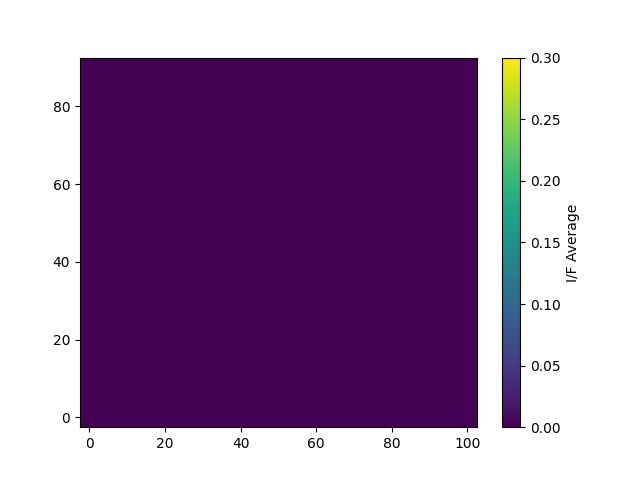

In [2]:
# CELL 2: Display single model, cycling through it in an animation.
%matplotlib ipympl
# Set the model by setting this line here to the one you want to look at:

animMatrix = loadedModels[0]
#insert the number of the model you wish to display.

cmap = 'viridis'
#if you want to change the color map

vmin=0
#Recommended to set this to 0 and never touch it. 

vmax=0.3 #Maximum displayed value.
#Raise if you're saturating, lower if you can't see any detail.

X = 21 #incidence
Y = 19 #Emission
Z = 37 #Azimuth

fig, ax = plt.subplots() #matplotlib's axis and figure notation is so annoying and obtuse...

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

c = ax.pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap,vmin=vmin,vmax=vmax)
fig.colorbar(c, ax=ax, label='I/F Average')
# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

def update(frame):
    ax.clear()
    zz = np.zeros((Y, X))
    for x in range(X):
        for y in range(Y):
            zz[y][x] = animMatrix[x][y][frame]
    azimuth = ax.pcolor(xx, yy, zz, cmap=cmap,vmin=vmin,vmax=vmax)
    ax.set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = 'Observation Angle Model. Azimuth: '+str(angles[frame])+ ' degrees')
    

ani = animation.FuncAnimation(fig, update, frames=Z, interval=500)

# To save the animation using Pillow as a gif. Use FFMpegFileWriter for mp4. 
#writer = animation.FFMpegFileWriter(fps = 2)
#ani.save('TEST2.mp4', writer = writer)
#writer = animation.PillowWriter(fps=5)
#ani.save('TEST2.gif', writer=writer)

plt.show()

In [3]:
# CELL 3: Stop the animation. Always do this before re-running cell 2.

ani.pause()
plt.close()

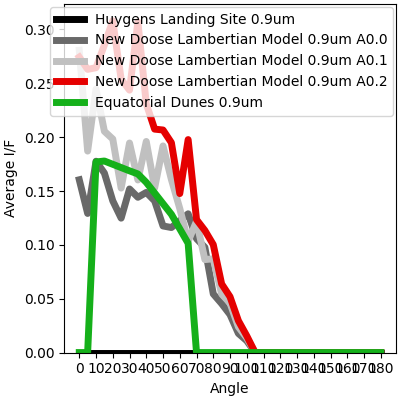

In [4]:
#CELL 4: OMNI DISPLAY: DISPLAYS ALL DATA AT ONCE ADJUSTABLE WITH SLIDERS.
#NOTE: currently, displaying more things has to be hardcoded in. Yes, it sucks. 
#There has to be a way to genrealize it.
%matplotlib ipympl 
#Allows animation and interaction.

plt.close()

angleSpace = np.linspace(0, 180, 37)
inciSpace = np.linspace(0, 100, 21)
emisSpace = np.linspace(0, 90, 19)
azimSpace = np.linspace(0, 180, 37)
typeSpace = {("inci", "emis", "azim")}

class ControlPlottingManager:
    models = len(loadedModels) #To keep the compiler from complaining about an empty class.
    #This class exists soley so I can store dynamically created functions in it.
    #I blame mpl_interactions.ipyplot for this, every funciton it plots has to be separately defined. 

i = 0
while (i < len(loadedModels)): #This loop here dynamically constructs a unique function for every line we want to plot.
    exec(
'''def controllablePlotter1(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    model = 1
    mod = 1 #Or 8???

    i = 0
    if (types == "inci"):
        while (i < 21):
            theLine.append(loadedModels[''' + str(i) + '''][i][emis][azim]*mod)
            i=i+1
    if (types == "emis"):
        while (i < 19):
            theLine.append(loadedModels[''' + str(i) + '''][inci][i][azim]*mod)
            i=i+1
    if (types == "azim"):
        while (i < 37):
            theLine.append(loadedModels[''' + str(i) + '''][inci][emis][i]*mod)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
    
def controllablePlotter2(inci,emis,azim,types): #FOR SCATTERING PLOTS!
    theLine = []
    dummyX = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    model = 1
    mod = 1 #Or 8???

    i = 0
    if (types == "inci"):
        while (i < 21):
            theLine.append(loadedModels[''' + str(i) + '''][i][emis][azim]*mod)
            dummyX.append(i)
            i=i+1
    if (types == "emis"):
        while (i < 19):
            theLine.append(loadedModels[''' + str(i) + '''][inci][i][azim]*mod)
            dummyX.append(i)
            i=i+1
    if (types == "azim"):
        while (i < 37):
            theLine.append(loadedModels[''' + str(i) + '''][inci][emis][i]*mod)
            dummyX.append(i)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        dummyX.append(i)
        i=i+1
    
    return dummyX, theLine'''
    )
    setattr(ControlPlottingManager, 'modelFunc' + str(i), controllablePlotter1)
    setattr(ControlPlottingManager, 'scatterFunc' + str(i), controllablePlotter2)
    i=i+1

angleLabels = [0, 10, 20, 30, 40, 50, 60, 70,
             80, 90, 100, 110, 120, 130, 140, 150,
             160, 170, 180] 

ticker = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]

#colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", 
         #"tab:olive", "tab:cyan", "k", "peru", "darkgreen", "skyblue", "navy", "blueviolet", "magenta", "palegreen", 
          #"teal", "purple"]

#So it turns out we did need a lot of colors eventually. 
colors = [ "black", "dimgray", "silver", "xkcd:red", "xkcd:green", "xkcd:brown", "xkcd:blue", "xkcd:pink", "xkcd:purple", "xkcd:brown", "xkcd:red",
         "xkcd:light blue", "xkcd:teal", "xkcd:orange", "xkcd:light green", "xkcd:magenta", "xkcd:yellow",
         "xkcd:sky blue", "xkcd:grey", "xkcd:lime green", "xkcd:light purple", "xkcd:violet", "xkcd:dark green",
         "xkcd:turquoise", "xkcd:lavender", "xkcd:dark blue", "xkcd:tan", "xkcd:cyan", "xkcd:aqua",
         "xkcd:forest green", "xkcd:mauve", "xkcd:dark purple", "xkcd:bright green", "xkcd:maroon", "xkcd:olive",
         "xkcd:salmon", "xkcd:beige", "xkcd:royal blue", "xkcd:navy blue", "xkcd:lilac", "xkcd:black", 
         "xkcd:hot pink", "xkcd:light brown", "xkcd:pale green", "xkcd:peach", "xkcd:olive green", "xkcd:dark pink",
         "xkcd:periwinkle", "xkcd:sea green", "xkcd:lime", "xkcd:indigo", "xkcd:mustard", "xkcd:light pink"]

#Sometimes the default color palette will start duplicating, we need to be able to differentiate. 
#Hence, a lot more colors. 

import mpl_interactions.ipyplot as iplt
fig, ax = plt.subplots(figsize = (4,4), layout="constrained") #matplotlib's axis and figure notation is so annoying and obtuse...

controls = iplt.plot(getattr(ControlPlottingManager, "modelFunc0"), inci=inciSpace, emis=emisSpace, azim=azimSpace, types=typeSpace, 
                     ax = ax, label=modelNames[0][1], color = colors[0], linewidth = 5)
#iplt.scatter(getattr(ControlPlottingManager, "modelPoints0"), #Need to find a way to plot another type of line over this one...

i = 1
while (i < len(loadedModels)):
    iplt.plot(getattr(ControlPlottingManager, "modelFunc" + str(i)), controls=controls, ax = ax, label=modelNames[i][1], color = colors[i], linewidth = 5)
    i=i+1



ax.set(ylim = 0.0, xlabel = "Angle", ylabel = "Average I/F", xticks = ticker, xticklabels = angleLabels)
fig.legend()
#plt.savefig("TitanColorSchemes.tif", format="tif", bbox_inches='tight')

plt.show()

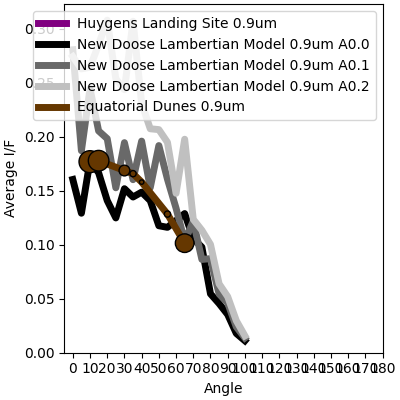

In [5]:
#Note: Heavy use of Gemini to figure out how to get this darn thing to WORK.

# Assuming the necessary libraries (numpy, matplotlib.pyplot, mpl_interactions.ipyplot) are imported
# and that `loadedModels` and `modelNames` are already defined.
# import numpy as np
# import matplotlib.pyplot as plt
# import mpl_interactions.ipyplot as iplt

#CELL 4: OMNI DISPLAY: DISPLAYS ALL DATA AT ONCE ADJUSTABLE WITH SLIDERS.

%matplotlib ipympl
#Allows animation and interaction.

plt.close()

import mpl_interactions.ipyplot as iplt
import mplcursors

angleSpace = np.linspace(0, 180, 37)
inciSpace = np.linspace(0, 100, 21)
emisSpace = np.linspace(0, 90, 19)
azimSpace = np.linspace(0, 180, 37)
# Use a tuple or list for consistent ordering, a set does not have an order.
typeSpace = ["inci", "emis", "azim"]

# This is our "function factory". It creates and returns a unique plotting
# function for a specific model index.
def create_plotter_function(model_index):
    """
    Creates a plotting function that is bound to a specific model's data.
    MODIFIED: Replaces zeros with np.nan to hide them from the plot.
    """
    def controllablePlotter(inci, emis, azim, types):
        model_data = loadedModels[model_index]
        mod = 1
        #if (model_index == 5): mod = 8

        inci_idx = int(inci / 5)
        emis_idx = int(emis / 5)
        azim_idx = int(azim / 5)

        theLine = []
        if types == "inci":
            theLine = [model_data[i][emis_idx][azim_idx] * mod for i in range(21)]
        elif types == "emis":
            theLine = [model_data[inci_idx][i][azim_idx] * mod for i in range(19)]
        elif types == "azim":
            theLine = [model_data[inci_idx][emis_idx][i] * mod for i in range(37)]

        # --- NEW LOGIC START ---
        # Convert to a NumPy array to efficiently replace zeros with NaN
        theLine_np = np.array(theLine, dtype=float)
        
        # Using np.isclose is safer for floating point numbers than `== 0`
        theLine_np[np.isclose(theLine_np, 0)] = np.nan 
        # --- NEW LOGIC END ---

        # Pad the list with nans to ensure its length is always 37.
        if len(theLine_np) < 37:
            num_to_pad = 37 - len(theLine_np)
            padding_array = np.full(num_to_pad, np.nan)
            theLine_np = np.concatenate([theLine_np, padding_array])

        return theLine_np # Return the NumPy array

    return controllablePlotter

def create_scatter_plotter_function(model_index):
    """
    Creates a plotting function that returns a SINGLE array of y-values,
    padded with np.nan to ensure its length is always 37.
    MODIFIED: Also replaces data zeros with np.nan.
    """
    def controllablePlotter(x, inci, emis, azim, types):
        model_data = loadedModels[model_index]
        existence_checker = loadedModelCounts[model_index] #We should never call this when the index is set to "N" due to a check elsewhere. We SHOULD be fine, but this comment remains in case some unforseen circumstance arises.
        mod = 1
        #if (model_index == 5): mod = 8

        inci_idx = int(inci / 5)
        emis_idx = int(emis / 5)
        azim_idx = int(azim / 5)

        theLine = []
        lineExistence = []
        if types == "inci":
            theLine = [model_data[i][emis_idx][azim_idx] * mod for i in range(21)]
            lineExistence = [existence_checker[i][emis_idx][azim_idx] * mod for i in range(21)]
        elif types == "emis":
            theLine = [model_data[inci_idx][i][azim_idx] * mod for i in range(19)]
            lineExistence = [existence_checker[inci_idx][i][azim_idx] * mod for i in range(19)]
        elif types == "azim":
            theLine = [model_data[inci_idx][emis_idx][i] * mod for i in range(37)]
            lineExistence = [existence_checker[inci_idx][emis_idx][i] * mod for i in range(37)]

        # Convert to a NumPy array to efficiently replace zeros with NaN
        theLine_np = np.array(theLine, dtype=float)
        theLine_np[np.isclose(theLine_np, 0)] = np.nan

        i = 0
        while (i < len(theLine_np)):
            if (lineExistence[i] <= 0):
                theLine_np[i] = np.nan
            i=i+1

        # The existing padding logic already uses np.nan, which is perfect.
        if len(theLine_np) < 37:
            num_to_pad = 37 - len(theLine_np)
            padding_array = np.full(num_to_pad, np.nan)
            theLine_np = np.concatenate([theLine_np, padding_array])

        return theLine_np

    return controllablePlotter

def create_scatter_size_function(model_index, size_multiplier=20):
    """
    Creates a function that returns an array of scatter point sizes based on
    the data in `loadedModelCounts`.
    """
    def controllableSizer(x, y, inci, emis, azim, types):
        existence_checker = loadedModelCounts[model_index]
        
        inci_idx = int(inci / 5)
        emis_idx = int(emis / 5)
        azim_idx = int(azim / 5)

        lineExistence = []
        if types == "inci":
            lineExistence = [existence_checker[i][emis_idx][azim_idx] for i in range(21)]
        elif types == "emis":
            lineExistence = [existence_checker[inci_idx][i][azim_idx] for i in range(19)]
        elif types == "azim":
            lineExistence = [existence_checker[inci_idx][emis_idx][i] for i in range(37)]

        # Convert counts to sizes. Use np.array for vectorized multiplication.
        sizes_np = np.array(lineExistence, dtype=float) * size_multiplier
        
        # Pad with 0 for size to make non-existent points have zero area.
        if len(sizes_np) < 37:
            num_to_pad = 37 - len(sizes_np)
            padding_array = np.zeros(num_to_pad) # Pad with 0
            sizes_np = np.concatenate([sizes_np, padding_array])
            
        return sizes_np
        
    return controllableSizer

# --- Main Plotting Logic ---

# Instead of dynamically creating functions in the global scope,
# we create them and store them in a list.
plot_functions = []
for i in range(len(loadedModels)):
    # For each model, create a dedicated plotting function and add it to our list.
    func = create_plotter_function(i)
    plot_functions.append(func)

# Create a list of functions that will provide Y-VALUES for the scatter plots.
scatter_y_functions = []
for i in range(len(loadedModels)):
    func = create_scatter_plotter_function(i)
    scatter_y_functions.append(func)

scatter_s_functions = [create_scatter_size_function(i, size_multiplier=10) for i in range(len(loadedModels))]



angleLabels = [0, 10, 20, 30, 40, 50, 60, 70,
               80, 90, 100, 110, 120, 130, 140, 150,
               160, 170, 180]

ticker = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]

colors = ["purple", "black", "dimgray", "silver", "xkcd:brown", "xkcd:green", "xkcd:blue", "xkcd:red", "xkcd:pink", "xkcd:pink", "xkcd:brown", "xkcd:red",
          "xkcd:light blue", "xkcd:teal", "xkcd:orange", "xkcd:light green", "xkcd:magenta", "xkcd:yellow",
          "xkcd:sky blue", "xkcd:grey", "xkcd:lime green", "xkcd:light purple", "xkcd:violet", "xkcd:dark green",
          "xkcd:turquoise", "xkcd:lavender", "xkcd:dark blue", "xkcd:tan", "xkcd:cyan", "xkcd:aqua",
          "xkcd:forest green", "xkcd:mauve", "xkcd:dark purple", "xkcd:bright green", "xkcd:maroon", "xkcd:olive",
          "xkcd:salmon", "xkcd:beige", "xkcd:royal blue", "xkcd:navy blue", "xkcd:lilac", "xkcd:black",
          "xkcd:hot pink", "xkcd:light brown", "xkcd:pale green", "xkcd:peach", "xkcd:olive green", "xkcd:dark pink",
          "xkcd:periwinkle", "xkcd:sea green", "xkcd:lime", "xkcd:indigo", "xkcd:mustard", "xkcd:light pink"]

fig, ax = plt.subplots(figsize=(4,4), layout="constrained")

slider_formats = {"types": "{}"}

# Plot the first model to generate the control widgets
controls = iplt.plot(plot_functions[0], inci=inciSpace, emis=emisSpace, azim=azimSpace, types=typeSpace,
                     ax=ax, label=modelNames[0][1], color=colors[0], linewidth=5, slider_formats=slider_formats)

# Plot the rest of the models, linking them to the same controls
for i in range(1, len(loadedModels)):
    iplt.plot(plot_functions[i], controls=controls, ax=ax, label=modelNames[i][1], color=colors[i], linewidth=5)

# Define a static x-axis that matches the implicit x-axis of the line plots.
x_indices = np.arange(37) 

# --- CHANGE 1: Create an empty list to store the scatter artists ---
scatter_artists = []

# Now, add interactive scatter plots for the models that require them.
for i in range(len(loadedModels)):
    if (len(loadedModelCounts[i]) > 1):
        # Provide a static X and a function for Y. This is a supported pattern.
        iplt.scatter(
            x_indices,
            scatter_y_functions[i], 
            controls=controls, 
            ax=ax, 
            color=colors[i], 
            s=scatter_s_functions[i],
            zorder=5,
            edgecolor = 'black'
        )
        new_artists = ax.collections[-2:]
        for artist in new_artists:
            artist.set_picker(5)
        scatter_artists.extend(new_artists)

ax.set(ylim=(0.0, None), xlabel="Angle", ylabel="Average I/F", xticks=ticker, xticklabels=angleLabels)
ax.legend()

plt.show() 

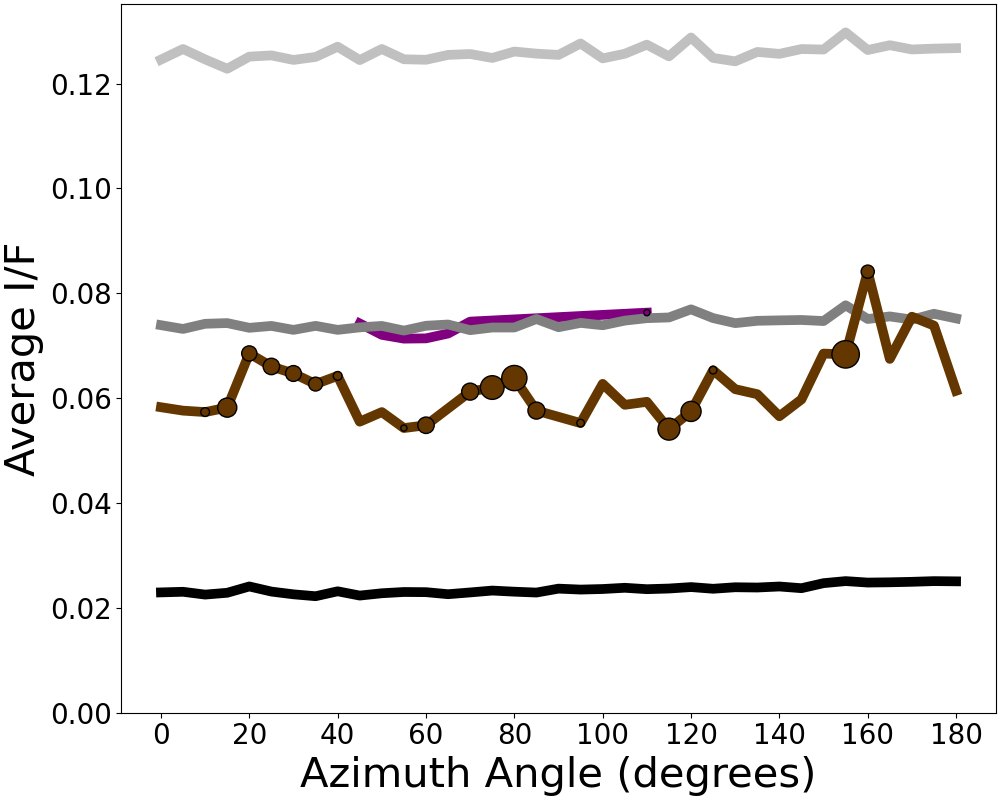

In [7]:
#Same as above, but you set the things manually

incidence_deg = 25
emission_deg= 30
azimuth_deg = 0
type_call = "azim"

%matplotlib ipympl
#Allows animation and interaction.

plt.close()

angleSpace = np.linspace(0, 180, 37)
inciSpace = np.linspace(0, 100, 21)
emisSpace = np.linspace(0, 90, 19)
azimSpace = np.linspace(0, 180, 37)
typeSpace = ["inci", "emis", "azim"]

def controllablePlotter(inci, emis, azim, types, model_index):
    model_data = loadedModels[model_index]
    mod = 1

    inci_idx = int(inci / 5)
    emis_idx = int(emis / 5)
    azim_idx = int(azim / 5)

    theLine = []
    if types == "inci":
        theLine = [model_data[i][emis_idx][azim_idx] * mod for i in range(21)]
    elif types == "emis":
        theLine = [model_data[inci_idx][i][azim_idx] * mod for i in range(19)]
    elif types == "azim":
        theLine = [model_data[inci_idx][emis_idx][i] * mod for i in range(37)]

    theLine_np = np.array(theLine, dtype=float)
    
    theLine_np[np.isclose(theLine_np, 0)] = np.nan 

    return theLine_np

def controllablePlotterScatter(inci, emis, azim, types, model_index):
    model_data = loadedModels[model_index]
    existence_checker = loadedModelCounts[model_index] #We should never call this when the index is set to "N" due to a check elsewhere. We SHOULD be fine, but this comment remains in case some unforseen circumstance arises.
    mod = 1

    inci_idx = int(inci / 5)
    emis_idx = int(emis / 5)
    azim_idx = int(azim / 5)

    theLine = []
    lineExistence = []
    if types == "inci":
        theLine = [model_data[i][emis_idx][azim_idx] * mod for i in range(21)]
        lineExistence = [existence_checker[i][emis_idx][azim_idx] * mod for i in range(21)]
    elif types == "emis":
        theLine = [model_data[inci_idx][i][azim_idx] * mod for i in range(19)]
        lineExistence = [existence_checker[inci_idx][i][azim_idx] * mod for i in range(19)]
    elif types == "azim":
        theLine = [model_data[inci_idx][emis_idx][i] * mod for i in range(37)]
        lineExistence = [existence_checker[inci_idx][emis_idx][i] * mod for i in range(37)]

    # Convert to a NumPy array to efficiently replace zeros with NaN
    theLine_np = np.array(theLine, dtype=float)
    theLine_np[np.isclose(theLine_np, 0)] = np.nan

    i = 0
    while (i < len(theLine_np)):
        if (lineExistence[i] <= 0):
            theLine_np[i] = np.nan
        i=i+1

    return theLine_np

def controllableSizer(inci, emis, azim, types, model_index,size_multiplier):
    existence_checker = loadedModelCounts[model_index]
    
    inci_idx = int(inci / 5)
    emis_idx = int(emis / 5)
    azim_idx = int(azim / 5)

    lineExistence = []
    if types == "inci":
        lineExistence = [existence_checker[i][emis_idx][azim_idx] for i in range(21)]
    elif types == "emis":
        lineExistence = [existence_checker[inci_idx][i][azim_idx] for i in range(19)]
    elif types == "azim":
        lineExistence = [existence_checker[inci_idx][emis_idx][i] for i in range(37)]

    sizes_np = np.array(lineExistence, dtype=float) * size_multiplier

    return sizes_np


# --- Main Plotting Logic ---
angleLabels = [0, 10, 20, 30, 40, 50, 60, 70,
               80, 90, 100, 110, 120, 130, 140, 150,
               160, 170, 180]

ticker = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]

colors = ["purple", "black", "gray", "silver", "xkcd:brown", "xkcd:green", "xkcd:blue", "xkcd:red", "xkcd:pink", "xkcd:pink", "xkcd:brown", "xkcd:red",
          "xkcd:light blue", "xkcd:teal", "xkcd:orange", "xkcd:light green", "xkcd:magenta", "xkcd:yellow",
          "xkcd:sky blue", "xkcd:grey", "xkcd:lime green", "xkcd:light purple", "xkcd:violet", "xkcd:dark green",
          "xkcd:turquoise", "xkcd:lavender", "xkcd:dark blue", "xkcd:tan", "xkcd:cyan", "xkcd:aqua",
          "xkcd:forest green", "xkcd:mauve", "xkcd:dark purple", "xkcd:bright green", "xkcd:maroon", "xkcd:olive",
          "xkcd:salmon", "xkcd:beige", "xkcd:royal blue", "xkcd:navy blue", "xkcd:lilac", "xkcd:black",
          "xkcd:hot pink", "xkcd:light brown", "xkcd:pale green", "xkcd:peach", "xkcd:olive green", "xkcd:dark pink",
          "xkcd:periwinkle", "xkcd:sea green", "xkcd:lime", "xkcd:indigo", "xkcd:mustard", "xkcd:light pink"]

fig, ax = plt.subplots(figsize=(10,8), layout="constrained")

slider_formats = {"types": "{}"}

# Plot the first model to generate the control widgets
ax.plot(controllablePlotter(incidence_deg,emission_deg,azimuth_deg,type_call,0), label=modelNames[0][1], color=colors[0], linewidth=7)

# Plot the rest of the models, linking them to the same controls
for i in range(1, len(loadedModels)):
    ax.plot(controllablePlotter(incidence_deg,emission_deg,azimuth_deg,type_call,i), label=modelNames[i][1], color=colors[i], linewidth=7)

# Define a static x-axis that matches the implicit x-axis of the line plots.
x_indices = []
if (type_call == "inci"): x_indices = np.arange(21) 
elif (type_call == "emis"): x_indices = np.arange(19) 
elif (type_call == "azim"): x_indices = np.arange(37) 

# --- CHANGE 1: Create an empty list to store the scatter artists ---
scatter_artists = []

# Now, add interactive scatter plots for the models that require them.
for i in range(len(loadedModels)):
    if (len(loadedModelCounts[i]) > 1):
        # Provide a static X and a function for Y. This is a supported pattern.
        ax.scatter(
            x_indices,
            controllablePlotterScatter(incidence_deg,emission_deg,azimuth_deg,type_call,i), 
            color=colors[i],
            s=controllableSizer(incidence_deg,emission_deg,azimuth_deg,type_call,i,10), 
            zorder=5,
            edgecolor = 'black'
        )
        new_artists = ax.collections[-2:]
        for artist in new_artists:
            artist.set_picker(5)
        scatter_artists.extend(new_artists)

if (type_call == "inci"):
    ax.set(ylim=(0.0, None), xlabel="Incidence Angle (degrees)", ylabel="Average I/F", xticks=ticker[:11], xticklabels=angleLabels[:11])
    #ax.set_title("Incidence Slice at " +str(emission_deg)+ "° Emission " + str(azimuth_deg) + "° Azimuth", fontsize=20)
    ax.set_xlabel("Incidence Angle (degrees)", fontsize=30)
elif (type_call == "emis"): 
    ax.set(ylim=(0.0, None), xlabel="Emission Angle (degrees)", ylabel="Average I/F", xticks=ticker[:10], xticklabels=angleLabels[:10])
    #ax.set_title("Emission Slice at " +str(incidence_deg)+ "° Incidence " + str(azimuth_deg) + "° Azimuth", fontsize=20)
    ax.set_xlabel("Emission Angle (degrees)", fontsize=30)
elif (type_call == "azim"): 
    ax.set(ylim=(0.0, None), xlabel="Azimuth Angle (degrees)", ylabel="Average I/F", xticks=[0,4,8,12,16,20,24,28,32,36], xticklabels=[0, 20, 40, 60,
               80, 100, 120, 140, 160, 180])
    #ax.set_title("Azimuth Slice at " +str(incidence_deg)+ "° Incidence " + str(emission_deg) + "° Emission", fontsize=20)
    ax.set_xlabel("Azimuth Angle (degrees)", fontsize=30)
ax.set_ylabel("Average I/F", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

output_filename = "OutputREMINK_" + type_call + "_" + str(incidence_deg) + "_" + str(emission_deg) + "_" + str(azimuth_deg) + ".pdf"
#plt.savefig(output_filename, format='pdf', bbox_inches='tight')

plt.show() 

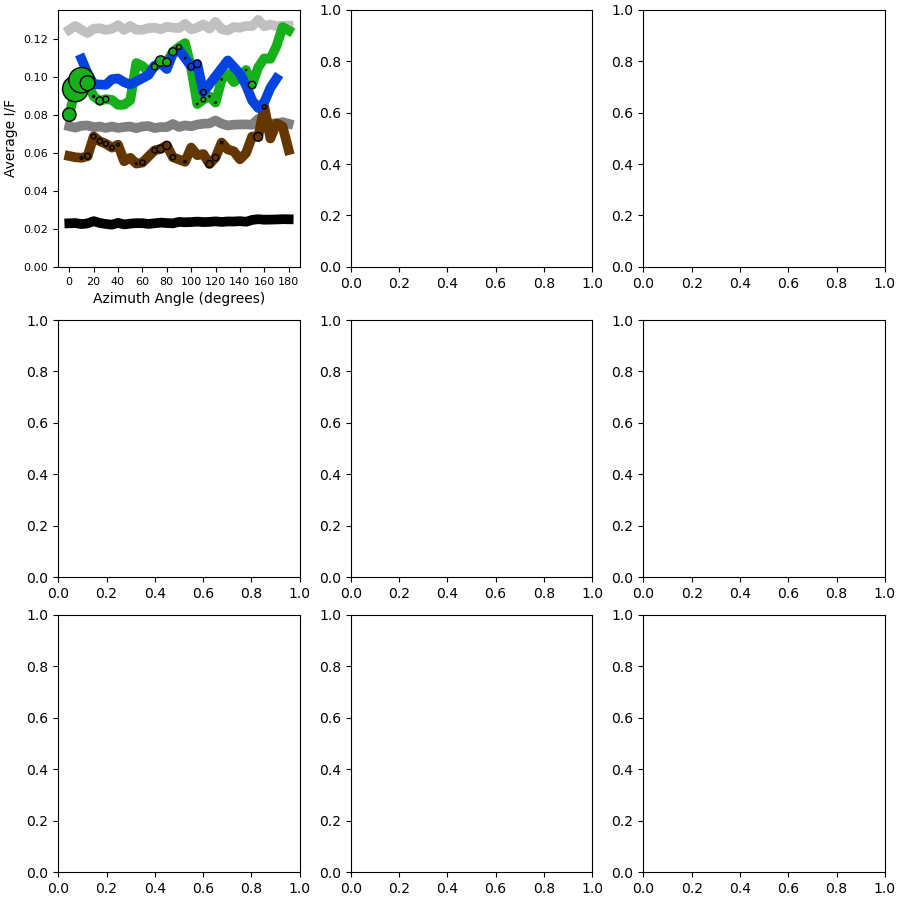

In [12]:
#Same as above, but you set the things manually

incidence_deg = 25
emission_deg= 30
azimuth_deg = 0
type_call = "azim"

%matplotlib ipympl
#Allows animation and interaction.

plt.close()

angleSpace = np.linspace(0, 180, 37)
inciSpace = np.linspace(0, 100, 21)
emisSpace = np.linspace(0, 90, 19)
azimSpace = np.linspace(0, 180, 37)
typeSpace = ["inci", "emis", "azim"]

def controllablePlotter(inci, emis, azim, types, model_index):
    model_data = loadedModels[model_index]
    mod = 1

    inci_idx = int(inci / 5)
    emis_idx = int(emis / 5)
    azim_idx = int(azim / 5)

    theLine = []
    if types == "inci":
        theLine = [model_data[i][emis_idx][azim_idx] * mod for i in range(21)]
    elif types == "emis":
        theLine = [model_data[inci_idx][i][azim_idx] * mod for i in range(19)]
    elif types == "azim":
        theLine = [model_data[inci_idx][emis_idx][i] * mod for i in range(37)]

    theLine_np = np.array(theLine, dtype=float)
    
    theLine_np[np.isclose(theLine_np, 0)] = np.nan 

    return theLine_np

def controllablePlotterScatter(inci, emis, azim, types, model_index):
    model_data = loadedModels[model_index]
    existence_checker = loadedModelCounts[model_index] #We should never call this when the index is set to "N" due to a check elsewhere. We SHOULD be fine, but this comment remains in case some unforseen circumstance arises.
    mod = 1

    inci_idx = int(inci / 5)
    emis_idx = int(emis / 5)
    azim_idx = int(azim / 5)

    theLine = []
    lineExistence = []
    if types == "inci":
        theLine = [model_data[i][emis_idx][azim_idx] * mod for i in range(21)]
        lineExistence = [existence_checker[i][emis_idx][azim_idx] * mod for i in range(21)]
    elif types == "emis":
        theLine = [model_data[inci_idx][i][azim_idx] * mod for i in range(19)]
        lineExistence = [existence_checker[inci_idx][i][azim_idx] * mod for i in range(19)]
    elif types == "azim":
        theLine = [model_data[inci_idx][emis_idx][i] * mod for i in range(37)]
        lineExistence = [existence_checker[inci_idx][emis_idx][i] * mod for i in range(37)]

    # Convert to a NumPy array to efficiently replace zeros with NaN
    theLine_np = np.array(theLine, dtype=float)
    theLine_np[np.isclose(theLine_np, 0)] = np.nan

    i = 0
    while (i < len(theLine_np)):
        if (lineExistence[i] <= 0):
            theLine_np[i] = np.nan
        i=i+1

    return theLine_np

def controllableSizer(inci, emis, azim, types, model_index,size_multiplier):
    existence_checker = loadedModelCounts[model_index]
    
    inci_idx = int(inci / 5)
    emis_idx = int(emis / 5)
    azim_idx = int(azim / 5)

    lineExistence = []
    if types == "inci":
        lineExistence = [existence_checker[i][emis_idx][azim_idx] for i in range(21)]
    elif types == "emis":
        lineExistence = [existence_checker[inci_idx][i][azim_idx] for i in range(19)]
    elif types == "azim":
        lineExistence = [existence_checker[inci_idx][emis_idx][i] for i in range(37)]

    sizes_np = np.array(lineExistence, dtype=float) * size_multiplier

    return sizes_np


# --- Main Plotting Logic ---
angleLabels = [0, 10, 20, 30, 40, 50, 60, 70,
               80, 90, 100, 110, 120, 130, 140, 150,
               160, 170, 180]

ticker = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]

colors = ["black", "gray", "silver", "xkcd:brown", "xkcd:green", "xkcd:blue", "xkcd:red", "xkcd:pink", "xkcd:pink", "xkcd:brown", "xkcd:red",
          "xkcd:light blue", "xkcd:teal", "xkcd:orange", "xkcd:light green", "xkcd:magenta", "xkcd:yellow",
          "xkcd:sky blue", "xkcd:grey", "xkcd:lime green", "xkcd:light purple", "xkcd:violet", "xkcd:dark green",
          "xkcd:turquoise", "xkcd:lavender", "xkcd:dark blue", "xkcd:tan", "xkcd:cyan", "xkcd:aqua",
          "xkcd:forest green", "xkcd:mauve", "xkcd:dark purple", "xkcd:bright green", "xkcd:maroon", "xkcd:olive",
          "xkcd:salmon", "xkcd:beige", "xkcd:royal blue", "xkcd:navy blue", "xkcd:lilac", "xkcd:black",
          "xkcd:hot pink", "xkcd:light brown", "xkcd:pale green", "xkcd:peach", "xkcd:olive green", "xkcd:dark pink",
          "xkcd:periwinkle", "xkcd:sea green", "xkcd:lime", "xkcd:indigo", "xkcd:mustard", "xkcd:light pink"]

fig, axs = plt.subplots(3,3, figsize = (9,9), layout = "constrained") 

slider_formats = {"types": "{}"}

# Plot the first model to generate the control widgets
axs[0][0].plot(controllablePlotter(incidence_deg,emission_deg,azimuth_deg,type_call,0), label=modelNames[0][1], color=colors[0], linewidth=7)

# Plot the rest of the models, linking them to the same controls
for i in range(1, len(loadedModels)):
    axs[0][0].plot(controllablePlotter(incidence_deg,emission_deg,azimuth_deg,type_call,i), label=modelNames[i][1], color=colors[i], linewidth=7)

# Define a static x-axis that matches the implicit x-axis of the line plots.
x_indices = []
if (type_call == "inci"): x_indices = np.arange(21) 
elif (type_call == "emis"): x_indices = np.arange(19) 
elif (type_call == "azim"): x_indices = np.arange(37) 

# --- CHANGE 1: Create an empty list to store the scatter artists ---
scatter_artists = []

# Now, add interactive scatter plots for the models that require them.
for i in range(len(loadedModels)):
    if (len(loadedModelCounts[i]) > 1):
        # Provide a static X and a function for Y. This is a supported pattern.
        axs[0][0].scatter(
            x_indices,
            controllablePlotterScatter(incidence_deg,emission_deg,azimuth_deg,type_call,i), 
            color=colors[i],
            s=controllableSizer(incidence_deg,emission_deg,azimuth_deg,type_call,i,1), 
            zorder=5,
            edgecolor = 'black'
        )
        new_artists = axs[0][0].collections[-2:]
        for artist in new_artists:
            artist.set_picker(5)
        scatter_artists.extend(new_artists)

if (type_call == "inci"):
    axs[0][0].set(ylim=(0.0, None), xlabel="Incidence Angle (degrees)", ylabel="Average I/F", xticks=ticker[:11], xticklabels=angleLabels[:11])
    #ax.set_title("Incidence Slice at " +str(emission_deg)+ "° Emission " + str(azimuth_deg) + "° Azimuth", fontsize=20)
    axs[0][0].set_xlabel("Incidence Angle (degrees)", fontsize=10)
elif (type_call == "emis"): 
    axs[0][0].set(ylim=(0.0, None), xlabel="Emission Angle (degrees)", ylabel="Average I/F", xticks=ticker[:10], xticklabels=angleLabels[:10])
    #ax.set_title("Emission Slice at " +str(incidence_deg)+ "° Incidence " + str(azimuth_deg) + "° Azimuth", fontsize=20)
    axs[0][0].set_xlabel("Emission Angle (degrees)", fontsize=10)
elif (type_call == "azim"): 
    axs[0][0].set(ylim=(0.0, None), xlabel="Azimuth Angle (degrees)", ylabel="Average I/F", xticks=[0,4,8,12,16,20,24,28,32,36], xticklabels=[0, 20, 40, 60,
               80, 100, 120, 140, 160, 180])
    #ax.set_title("Azimuth Slice at " +str(incidence_deg)+ "° Incidence " + str(emission_deg) + "° Emission", fontsize=20)
    axs[0][0].set_xlabel("Azimuth Angle (degrees)", fontsize=10)
axs[0][0].set_ylabel("Average I/F", fontsize=10)
axs[0][0].tick_params(axis='both', which='major', labelsize=8)

output_filename = "OutputREMINK_" + type_call + "_" + str(incidence_deg) + "_" + str(emission_deg) + "_" + str(azimuth_deg) + ".pdf"
#plt.savefig(output_filename, format='pdf', bbox_inches='tight')

plt.show() 

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Specify Your Desired Settings ---
# Find a view you like with the interactive slider and enter the values here.
target_inci = 35.0
target_azim = 90.0
target_type = 'typeB'
# Note: The 'emis' value from the interactive plot is not used for data slicing,
# as the emission angle serves as the x-axis for the entire plot.

# --- 2. Find the Closest Index for Each Setting ---
# This logic is identical to the interactive plot's internal workings. It finds
# the index of the data point in our arrays that is closest to our target value.
inci_idx = np.argmin(np.abs(inci - target_inci))
azim_idx = np.argmin(np.abs(azim - target_azim))
types_idx = types.index(target_type)

# --- 3. Slice the Data for Plotting ---
# The x-axis is the full range of emission angles.
x_values = emis
# The y-axis is the data slice corresponding to our chosen settings.
y_values = data[inci_idx, :, azim_idx, types_idx]

# --- 4. Generate the Plot ---
# Create a new figure and axes for our static plot.
fig, ax = plt.subplots(figsize=(8, 6)) # Adjust figsize for desired aspect ratio

# Plot the selected data
ax.plot(x_values, y_values, marker='o', linestyle='-', label=f'Data for {target_type}')

# --- 5. Customize and Add Labels ---
# Use the *actual* values from the arrays for labeling, which are the closest
# match to our target values.
actual_inci = inci[inci_idx]
actual_azim = azim[azim_idx]

# Set a descriptive title and labels
title = (f'Reflectance Model Output\n'
         f'Incidence: ${actual_inci:.1f}^\\circ$, Azimuth: ${actual_azim:.1f}^\\circ$, Type: {target_type}')
ax.set_title(title)
ax.set_xlabel('Emission Angle ($^\\circ$)')
ax.set_ylabel('Reflectance')

# Set plot limits and add a grid for readability
ax.set_ylim([0, 1])
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

# --- 6. Save the Figure as a PDF ---
# Define the output filename
output_filename = 'specific_plot_view.pdf'

# Save the figure. `bbox_inches='tight'` trims excess whitespace.
plt.savefig(output_filename, format='pdf', bbox_inches='tight')

# Close the plot to free up memory
plt.close(fig)

print(f"Plot successfully saved to: {output_filename}")

NameError: name 'types' is not defined

In [32]:
#CUBE PRINTER
#until we figure out how to do this automatically, just find the cubes listed for values manually:
model = 0 #Which loaded one are we looking at?
inci = 7 #do by index, not degrees
emis = 7
azim = 30

print(loadedModelCubs[0][7][6][32])

for item in loadedModelCubs[model][inci][emis][azim]:
    print(item)


[['TA', '1477490810_1']]
['TB', '1481624349_1']
['TB', '1481624349_1']
['TB', '1481624349_1']
['TB', '1481624349_1']


In [56]:
%matplotlib ipympl

plt.close()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D plotting

# --- Preamble for Jupyter Notebook ---
# To enable interactive plots in Jupyter Lab, you might need to run:
# %matplotlib widget
# In a classic Jupyter Notebook, you might use:
# %matplotlib notebook
# This line should be in its own cell before you run the plotting code.

# --- 1. Generate Sample Data ---
# This section is identical to the previous example.
num_models = 1
num_incidence = 21
num_emission = 19
num_azimuth = 37

NPloadedModelCounts = np.array(loadedModelCounts)

# Create random counts (loadedModelCounts) between 0 and 50.
zero_mask = np.random.choice([True, False], size=NPloadedModelCounts.shape, p=[0.8, 0.2])
NPloadedModelCounts[zero_mask] = 0


# --- 2. Prepare Data for Plotting ---
# This section is also identical.
model_index = 0
model_if_data = loadedModels[model_index]
model_counts_data = loadedModelCounts[model_index]

inc_dim, emi_dim, azi_dim = model_if_data.shape

inc_angles = np.arange(inc_dim)
emi_angles = np.arange(emi_dim)
azi_angles = np.arange(azi_dim)

inc_coords, emi_coords, azi_coords = np.meshgrid(inc_angles, emi_angles, azi_angles, indexing='ij')

# --- 3. Filter the Data ---
# Identical filtering logic.
valid_points_mask = model_counts_data > 0

x_coords = inc_coords[valid_points_mask]
y_coords = emi_coords[valid_points_mask]
z_coords = azi_coords[valid_points_mask]

plot_colors = model_if_data[valid_points_mask]
plot_sizes = model_counts_data[valid_points_mask]


# --- 4. Create the 3D Scatter Plot with Matplotlib ---
# Create a figure and a 3D subplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# The 's' parameter in matplotlib's scatter refers to marker area.
# We can scale the counts to get a reasonable visual size.
# Let's multiply by a factor, you can adjust this as needed.
scaled_sizes = plot_sizes * 5 

# Create the scatter plot
# 'c' is for color, 's' is for size, 'cmap' is the colormap
scatter = ax.scatter(x_coords, y_coords, z_coords, 
                     c=plot_colors, 
                     s=20, #scaled_sizes 
                     cmap='gist_ncar',
                     depthshade=True)

# --- 5. Customize the Layout ---
# Add a color bar to show the mapping of colors to I/F values
cbar = fig.colorbar(scatter, shrink=0.5, aspect=10)
cbar.set_label('I/F Value')

# Add titles and labels
ax.set_title('3D Plot of I/F Data (Matplotlib)')
ax.set_xlabel('Incidence Angle Index')
ax.set_ylabel('Emission Angle Index')
ax.set_zlabel('Azimuth Angle Index')

angleLabelsX = [0, 10, 20, 30, 40, 50, 60, 70,
               80, 90, 100]
angleLabelsY = [0, 10, 20, 30, 40, 50, 60, 70,
               80, 90]
angleLabelsZ = [0, 10, 20, 30, 40, 50, 60, 70,
               80, 90, 100, 110, 120, 130, 140, 150,
               160, 170, 180]

tickerX = [0,2,4,6,8,10,12,14,16,18,20]
tickerY = [0,2,4,6,8,10,12,14,16,18]
tickerZ = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]

ax.set(xticks=tickerX, xticklabels=angleLabelsX,
      yticks=tickerY, yticklabels=angleLabelsY,
      zticks=tickerZ, zticklabels=angleLabelsZ,)

# --- 6. Show the Plot ---
# This will render the plot in the cell's output.
plt.show()



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.

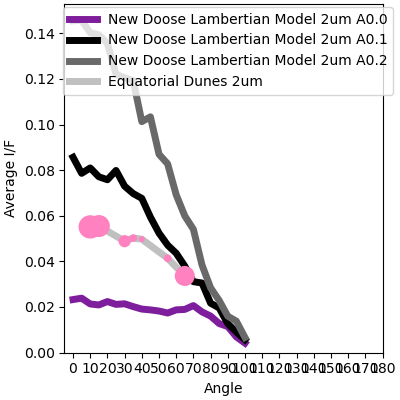

In [8]:
#Note: Heavy use of Gemini to figure out how to get this darn thing to WORK.

# Assuming the necessary libraries (numpy, matplotlib.pyplot, mpl_interactions.ipyplot) are imported
# and that `loadedModels` and `modelNames` are already defined.
# import numpy as np
# import matplotlib.pyplot as plt
# import mpl_interactions.ipyplot as iplt

#CELL 4: OMNI DISPLAY: DISPLAYS ALL DATA AT ONCE ADJUSTABLE WITH SLIDERS.

%matplotlib ipympl
#Allows animation and interaction.

plt.close()

import mpl_interactions.ipyplot as iplt
import mplcursors

angleSpace = np.linspace(0, 180, 37)
inciSpace = np.linspace(0, 100, 21)
emisSpace = np.linspace(0, 90, 19)
azimSpace = np.linspace(0, 180, 37)
# Use a tuple or list for consistent ordering, a set does not have an order.
typeSpace = ["inci", "emis", "azim"]

# This is our "function factory". It creates and returns a unique plotting
# function for a specific model index.
def create_plotter_function(model_index):
    """
    Creates a plotting function that is bound to a specific model's data.
    MODIFIED: Replaces zeros with np.nan to hide them from the plot.
    """
    def controllablePlotter(inci, emis, azim, types):
        model_data = loadedModels[model_index]
        mod = 1.0

        inci_idx = int(inci / 5)
        emis_idx = int(emis / 5)
        azim_idx = int(azim / 5)

        theLine = []
        if types == "inci":
            theLine = [model_data[i][emis_idx][azim_idx] * mod for i in range(21)]
        elif types == "emis":
            theLine = [model_data[inci_idx][i][azim_idx] * mod for i in range(19)]
        elif types == "azim":
            theLine = [model_data[inci_idx][emis_idx][i] * mod for i in range(37)]

        # --- NEW LOGIC START ---
        # Convert to a NumPy array to efficiently replace zeros with NaN
        theLine_np = np.array(theLine, dtype=float)
        
        # Using np.isclose is safer for floating point numbers than `== 0`
        theLine_np[np.isclose(theLine_np, 0)] = np.nan 
        # --- NEW LOGIC END ---

        # Pad the list with nans to ensure its length is always 37.
        if len(theLine_np) < 37:
            num_to_pad = 37 - len(theLine_np)
            padding_array = np.full(num_to_pad, np.nan)
            theLine_np = np.concatenate([theLine_np, padding_array])

        return theLine_np # Return the NumPy array

    return controllablePlotter

def create_scatter_plotter_function(model_index):
    """
    Creates a plotting function that returns a SINGLE array of y-values,
    padded with np.nan to ensure its length is always 37.
    MODIFIED: Also replaces data zeros with np.nan.
    """
    def controllablePlotter(x, inci, emis, azim, types):
        model_data = loadedModels[model_index]
        existence_checker = loadedModelCounts[model_index] #We should never call this when the index is set to "N" due to a check elsewhere. We SHOULD be fine, but this comment remains in case some unforseen circumstance arises.
        mod = 1.0 

        inci_idx = int(inci / 5)
        emis_idx = int(emis / 5)
        azim_idx = int(azim / 5)

        theLine = []
        lineExistence = []
        if types == "inci":
            theLine = [model_data[i][emis_idx][azim_idx] * mod for i in range(21)]
            lineExistence = [existence_checker[i][emis_idx][azim_idx] * mod for i in range(21)]
        elif types == "emis":
            theLine = [model_data[inci_idx][i][azim_idx] * mod for i in range(19)]
            lineExistence = [existence_checker[inci_idx][i][azim_idx] * mod for i in range(19)]
        elif types == "azim":
            theLine = [model_data[inci_idx][emis_idx][i] * mod for i in range(37)]
            lineExistence = [existence_checker[inci_idx][emis_idx][i] * mod for i in range(37)]

        # Convert to a NumPy array to efficiently replace zeros with NaN
        theLine_np = np.array(theLine, dtype=float)
        theLine_np[np.isclose(theLine_np, 0)] = np.nan

        i = 0
        while (i < len(theLine_np)):
            if (lineExistence[i] <= 0):
                theLine_np[i] = np.nan
            i=i+1

        # The existing padding logic already uses np.nan, which is perfect.
        if len(theLine_np) < 37:
            num_to_pad = 37 - len(theLine_np)
            padding_array = np.full(num_to_pad, np.nan)
            theLine_np = np.concatenate([theLine_np, padding_array])

        return theLine_np

    return controllablePlotter

def create_scatter_size_function(model_index, size_multiplier=20):
    """
    Creates a function that returns an array of scatter point sizes based on
    the data in `loadedModelCounts`.
    """
    def controllableSizer(x, y, inci, emis, azim, types):
        existence_checker = loadedModelCounts[model_index]
        
        inci_idx = int(inci / 5)
        emis_idx = int(emis / 5)
        azim_idx = int(azim / 5)

        lineExistence = []
        if types == "inci":
            lineExistence = [existence_checker[i][emis_idx][azim_idx] for i in range(21)]
        elif types == "emis":
            lineExistence = [existence_checker[inci_idx][i][azim_idx] for i in range(19)]
        elif types == "azim":
            lineExistence = [existence_checker[inci_idx][emis_idx][i] for i in range(37)]

        # Convert counts to sizes. Use np.array for vectorized multiplication.
        sizes_np = np.array(lineExistence, dtype=float) * size_multiplier
        
        # Pad with 0 for size to make non-existent points have zero area.
        if len(sizes_np) < 37:
            num_to_pad = 37 - len(sizes_np)
            padding_array = np.zeros(num_to_pad) # Pad with 0
            sizes_np = np.concatenate([sizes_np, padding_array])
            
        return sizes_np
        
    return controllableSizer

# --- Main Plotting Logic ---

# Instead of dynamically creating functions in the global scope,
# we create them and store them in a list.
plot_functions = []
for i in range(len(loadedModels)):
    # For each model, create a dedicated plotting function and add it to our list.
    func = create_plotter_function(i)
    plot_functions.append(func)

# Create a list of functions that will provide Y-VALUES for the scatter plots.
scatter_y_functions = []
for i in range(len(loadedModels)):
    func = create_scatter_plotter_function(i)
    scatter_y_functions.append(func)

scatter_s_functions = [create_scatter_size_function(i, size_multiplier=10) for i in range(len(loadedModels))]



angleLabels = [0, 10, 20, 30, 40, 50, 60, 70,
               80, 90, 100, 110, 120, 130, 140, 150,
               160, 170, 180]

ticker = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]

colors = ["xkcd:purple", "black", "dimgray", "silver", "xkcd:brown", "xkcd:green", "xkcd:blue", "xkcd:red", "xkcd:pink", "xkcd:purple", "xkcd:brown", "xkcd:red",
          "xkcd:light blue", "xkcd:teal", "xkcd:orange", "xkcd:light green", "xkcd:magenta", "xkcd:yellow",
          "xkcd:sky blue", "xkcd:grey", "xkcd:lime green", "xkcd:light purple", "xkcd:violet", "xkcd:dark green",
          "xkcd:turquoise", "xkcd:lavender", "xkcd:dark blue", "xkcd:tan", "xkcd:cyan", "xkcd:aqua",
          "xkcd:forest green", "xkcd:mauve", "xkcd:dark purple", "xkcd:bright green", "xkcd:maroon", "xkcd:olive",
          "xkcd:salmon", "xkcd:beige", "xkcd:royal blue", "xkcd:navy blue", "xkcd:lilac", "xkcd:black",
          "xkcd:hot pink", "xkcd:light brown", "xkcd:pale green", "xkcd:peach", "xkcd:olive green", "xkcd:dark pink",
          "xkcd:periwinkle", "xkcd:sea green", "xkcd:lime", "xkcd:indigo", "xkcd:mustard", "xkcd:light pink"]

fig, ax = plt.subplots(figsize=(4,4), layout="constrained")

slider_formats = {"types": "{}"}

# Plot the first model to generate the control widgets
controls = iplt.plot(plot_functions[0], inci=inciSpace, emis=emisSpace, azim=azimSpace, types=typeSpace,
                     ax=ax, label=modelNames[0][1], color=colors[0], linewidth=5, slider_formats=slider_formats)

# Plot the rest of the models, linking them to the same controls
for i in range(1, len(loadedModels)):
    iplt.plot(plot_functions[i], controls=controls, ax=ax, label=modelNames[i][1], color=colors[i], linewidth=5)

# Define a static x-axis that matches the implicit x-axis of the line plots.
x_indices = np.arange(37) 

# --- CHANGE 1: Create an empty list to store the scatter artists ---
scatter_artists = []

# Now, add interactive scatter plots for the models that require them.
for i in range(len(loadedModels)):
    if (len(loadedModelCounts[i]) > 1):
        # Provide a static X and a function for Y. This is a supported pattern.
        iplt.scatter(
            x_indices,
            scatter_y_functions[i], 
            controls=controls, 
            ax=ax, 
            color=colors[i+5], 
            s=scatter_s_functions[i],
            zorder=5
        )
        new_artists = ax.collections[-2:]
        for artist in new_artists:
            artist.set_picker(5)
        scatter_artists.extend(new_artists)

ax.set(ylim=(0.0, None), xlabel="Angle", ylabel="Average I/F", xticks=ticker, xticklabels=angleLabels)
fig.legend()

# --- NEW HOVER ANNOTATION LOGIC ---

# 1. Create a cursor object. hover=True makes annotations appear on hover
#    instead of on click.
cursor = mplcursors.cursor(scatter_artists, hover=True)

# 2. Define the function that will be called to create the annotation.
#    The decorator is a clean way to "connect" this function to the cursor.
@cursor.connect("add")

def show_count_annotation(sel):
    # sel.target.index for a split artist will be relative to that artist's
    # own data array (e.g., index 5 of the even artist). We need the
    # original index (e.g., 10). We can get this from the x-coordinate.
    original_index = int(np.round(sel.target[0]))

    artist_label = sel.artist.get_label()


    model_index = -1
    for i, name_tuple in enumerate(modelNames):
        if name_tuple[1] == artist_label:
            model_index = i
            break


    if model_index == -1: return

    inci = controls.widgets['inci'].value
    emis = controls.widgets['emis'].value
    azim = controls.widgets['azim'].value
    types = controls.widgets['types'].value

    existence_checker = loadedModelCounts[model_index]
    inci_idx = int(inci / 5); emis_idx = int(emis / 5); azim_idx = int(azim / 5)
    lineExistence = []
    if types == "inci": lineExistence = [existence_checker[i][emis_idx][azim_idx] for i in range(21)]
    elif types == "emis": lineExistence = [existence_checker[inci_idx][i][azim_idx] for i in range(19)]
    elif types == "azim": lineExistence = [existence_checker[inci_idx][emis_idx][i] for i in range(37)]


    # We no longer need to pad because we are using the original_index which
    # will always be valid for the unpadded lineExistence list.


    # Use the original index derived from the x-coordinate for the lookup.
    count = lineExistence[original_index]

    sel.annotation.set_text(f'Count: {int(count)}')

plt.show() 

TypeError: create_scatter_plotter_function.<locals>.controllablePlotter() got an unexpected keyword argument 'linewidths'

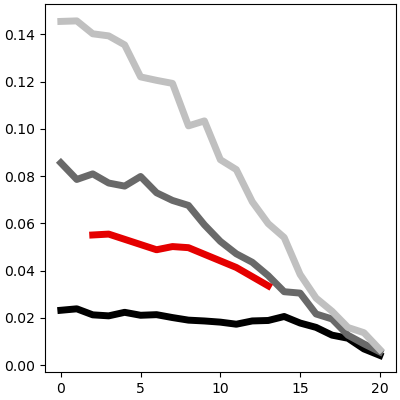

In [9]:
# --- FINAL DIAGNOSTIC CODE (Revised for older API) ---
# Goal: To use the library's own event system via the plot-creation call.

%matplotlib ipympl
import matplotlib.pyplot as plt
import mpl_interactions.ipyplot as iplt
import numpy as np

# Your function definitions must be in a cell above this one
# create_plotter_function, etc.
# ...

# --- Main Plotting Logic ---

plot_functions = [create_plotter_function(i) for i in range(len(loadedModels))]
scatter_y_functions = [create_scatter_plotter_function(i) for i in range(len(loadedModels))]
scatter_s_functions = [create_scatter_size_function(i, size_multiplier=30) for i in range(len(loadedModels))]

angleLabels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]
ticker = np.arange(0, 38, 2)
colors = ["black", "dimgray", "silver", "xkcd:red", "xkcd:green", "xkcd:brown", "xkcd:blue", "xkcd:pink", "xkcd:purple", "xkcd:brown", "xkcd:red", "xkcd:light blue", "xkcd:teal", "xkcd:orange", "xkcd:light green", "xkcd:magenta", "xkcd:yellow", "xkcd:sky blue", "xkcd:grey", "xkcd:lime green", "xkcd:light purple", "xkcd:violet", "xkcd:dark green", "xkcd:turquoise", "xkcd:lavender", "xkcd:dark blue", "xkcd:tan", "xkcd:cyan", "xkcd:aqua", "xkcd:forest green", "xkcd:mauve", "xkcd:dark purple", "xkcd:bright green", "xkcd:maroon", "xkcd:olive", "xkcd:salmon", "xkcd:beige", "xkcd:royal blue", "xkcd:navy blue", "xkcd:lilac", "xkcd:black", "xkcd:hot pink", "xkcd:light brown", "xkcd:pale green", "xkcd:peach", "xkcd:olive green", "xkcd:dark pink", "xkcd:periwinkle", "xkcd:sea green", "xkcd:lime", "xkcd:indigo", "xkcd:mustard", "xkcd:light pink"]


fig, ax = plt.subplots(figsize=(4,4), layout="constrained")
slider_formats = {"types": "{}"}

# Define the diagnostic callback function first
def on_hover_event(index):
    # In this older API, the callback often just receives the index of the point.
    print("--- mpl-interactions Hover Event ---")
    print(f"Index reported: {index}")
    print("------------------------------------")

controls = iplt.plot(plot_functions[0], inci=inciSpace, emis=emisSpace, azim=azimSpace, types=typeSpace,
                     ax=ax, label=modelNames[0][1], color=colors[0], linewidth=5, slider_formats=slider_formats)

for i in range(1, len(loadedModels)):
    iplt.plot(plot_functions[i], controls=controls, ax=ax, label=modelNames[i][1], color=colors[i], linewidth=5)

x_indices = np.arange(37)

# Create the scatter plots
for i in range(len(loadedModels)):
    if (len(loadedModelCounts[i]) > 1):
        iplt.scatter(
            x_indices,
            scatter_y_functions[i],
            s=scatter_s_functions[i],
            controls=controls,
            ax=ax,
            color=colors[i],
            zorder=5,
            edgecolors='white',
            linewidths=0.5,
            label=modelNames[i][1],
            # Pass the callback function directly to the scatter call
            on_hover=on_hover_event
        )

ax.set(ylim=(0.0, None), xlabel="Angle", ylabel="Average I/F", xticks=ticker, xticklabels=angleLabels)
fig.legend()

plt.show()


VBox()

VBox()

VBox()

VBox()

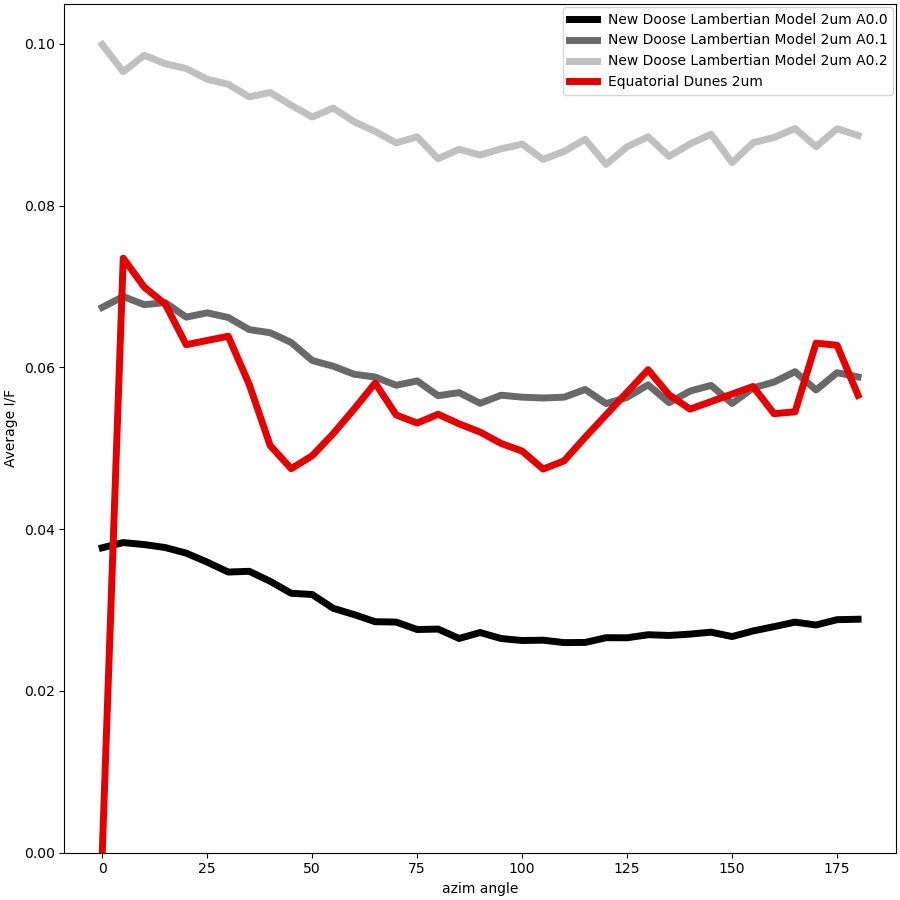

In [10]:
#CELL 5: Printing a single image rather than having to move the sliders. Generally used for printing out the images at the end.

plt.close()
# Getting a Sliced Line through the thing...
sline = "azim" # "inci" "emis" "azim" choose which variable to slice through.
inci = 10 #incidence, 13=65 degrees. This is the index that increments every 5 degrees.
emis = 9 #emission, 12=60 degrees. This is the index that increments every 5 degrees.
azim = 18 #azimuth, 36=180 degrees. This is the index that increments every 5 degrees.

#The variable being sliced through will not be used. 
Eangles = []
allModels = []
for model in modelNames:
    allModels.append([])

#Load in 
i = 0
if (sline == "inci"):
    while (i < 21):
        j = 0
        while (j < len(modelNames)):
            allModels[j].append(loadedModels[j][i][emis][azim])
            j=j+1
        Eangles.append(i*5.)
        i=i+1
if (sline == "emis"):
    while (i < 19):
        j = 0
        while (j < len(modelNames)):
            allModels[j].append(loadedModels[j][inci][i][azim])
            j=j+1
        Eangles.append(i*5.)
        i=i+1
if (sline == "azim"):
    while (i < 37):
        j = 0
        while (j < len(modelNames)):
            allModels[j].append(loadedModels[j][inci][emis][i])
            j=j+1
        Eangles.append(i*5.)
        i=i+1

fig, ax = plt.subplots(figsize = (9,9), layout="constrained") #matplotlib's axis and figure notation is so annoying and obtuse...

i = 0
while (i < len(modelNames)):
    iplt.plot(Eangles, np.array(allModels[i]), label=modelNames[i][1], color=colors[i], linewidth = 5)
    i=i+1

ax.set(xlabel = sline + " angle")
ax.set(ylabel = "Average I/F")
fig.legend()

ax.set(ylim = 0.0)

plt.show()

In [20]:
#Cell 6: Save the plot you just generated.

#Remember to set the name you want to save it as here:
plt.savefig("Models2umLambAlbedos.Inci50.Emis45.AzimSlice.pdf", format="pdf")
#"Models2umLambAlbedos.Inci50.Emis45.Azim90.pdf"

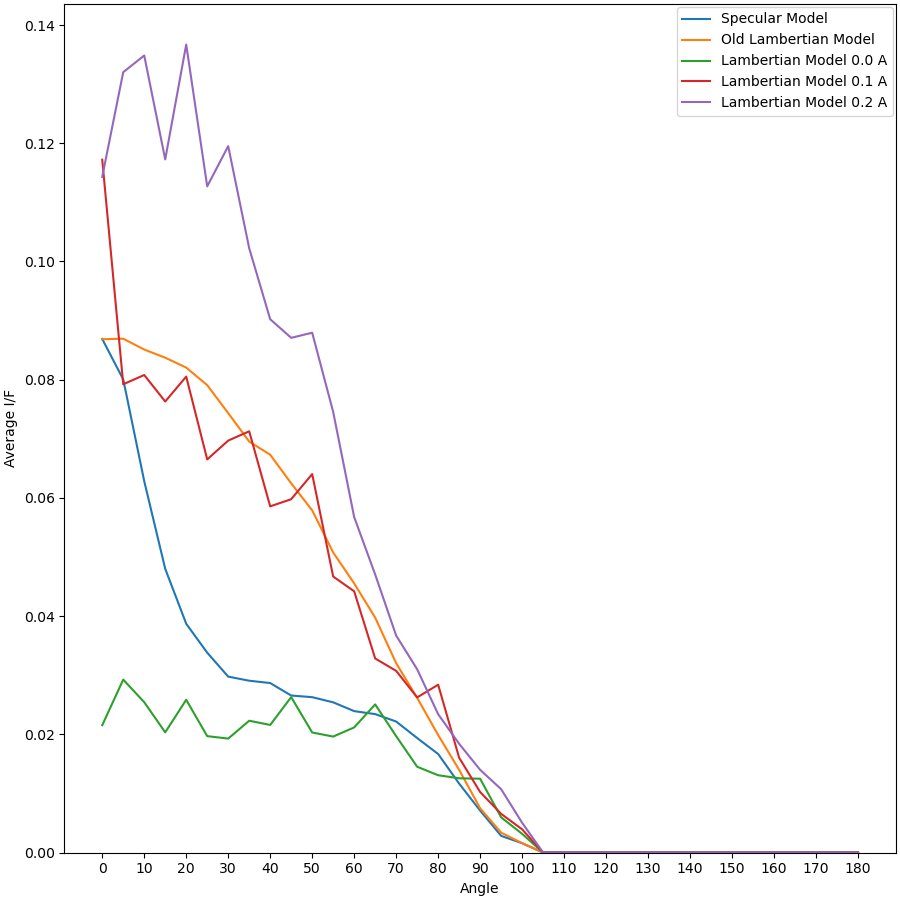

In [12]:
#OLD LEGACY CODE IN CASE THE ABOVE BREAKS SINCE WHILE THIS IS A PAIN IT IS SIMPLE AND EASY TO UNDERSTAND.
#NOTE: currently, displaying more things has to be hardcoded in. Yes, it sucks. 
#There has to be a way to genrealize it.
%matplotlib ipympl 
#Allows animation and interaction.

plt.close()
import mpl_interactions.ipyplot as iplt
fig, ax = plt.subplots(figsize = (9,9), layout="constrained") #matplotlib's axis and figure notation is so annoying and obtuse...

angleSpace = np.linspace(0, 180, 37)
inciSpace = np.linspace(0, 100, 21)
emisSpace = np.linspace(0, 90, 19)
azimSpace = np.linspace(0, 180, 37)
typeSpace = np.linspace(1,3,3)

def SM(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(specSim[i][emis][azim]*8)
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(specSim[inci][i][azim]*8)
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(specSim[inci][emis][i]*8)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LM(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(lambSim[i][emis][azim]*8)
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(lambSim[inci][i][azim]*8)
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(lambSim[inci][emis][i]*8)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LkD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixLake[i][emis][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixLake[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixLake[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LnD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixLand[i][emis][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixLand[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixLand[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def SpecialD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixHuygens[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixHuygens[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixHuygens[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eDunes(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixDunes[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixDunes[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixDunes[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def ePlains(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixPlains[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixPlains[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixPlains[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eHumm(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixHumm[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixHumm[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixHumm[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eXana(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixXanadu[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixXanadu[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixXanadu[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1

    return theLine

def L0(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(lambSim0[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(lambSim0[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(lambSim0[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1

    return theLine

def L1(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(lambSim1[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(lambSim1[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(lambSim1[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1

    return theLine

def L2(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(lambSim2[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(lambSim2[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(lambSim2[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1

    return theLine


angleLabels = [0, 10, 20, 30, 40, 50, 60, 70,
             80, 90, 100, 110, 120, 130, 140, 150,
             160, 170, 180] 

ticker = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]

controls = iplt.plot(SM, inci=inciSpace, emis=emisSpace, azim=azimSpace, types=typeSpace, ax = ax, label="Specular Model")
iplt.plot(LM, controls=controls, ax = ax, label="Old Lambertian Model")
#iplt.plot(LkD, controls=controls, ax = ax, label="North Pole Lake Data")
#iplt.plot(LnD, controls=controls, ax = ax, label="North Pole Land Data")
#iplt.plot(eDunes, controls=controls, ax = ax, label="Equatorial Dunes Data")
#iplt.plot(ePlains, controls=controls, ax = ax, label="Equatorial Plains Data")
#iplt.plot(eHumm, controls=controls, ax = ax, label="Equatorial Hummocky Data")
#iplt.plot(eXana, controls=controls, ax = ax, label="Equatorial Xanadu Data")
#iplt.plot(SpecialD2, controls=controls, ax = ax, label="New 2um Specular Model (Haze 2)")
#iplt.plot(SpecialD, controls=controls, ax = ax, label="Huygens Landing Site Data")
#iplt.plot(HMR, controls=controls, ax = ax, label="Huygens Landing Site Data (Reduced)")
#iplt.plot(HMR2, controls=controls, ax = ax, label="Huygens Landing Site Data (Reduced2)")
iplt.plot(L0, controls=controls, ax = ax, label="Lambertian Model 0.0 A")
iplt.plot(L1, controls=controls, ax = ax, label="Lambertian Model 0.1 A")
iplt.plot(L2, controls=controls, ax = ax, label="Lambertian Model 0.2 A")
ax.set(ylim = 0.0,xlabel = "Angle", ylabel = "Average I/F", xticks = ticker, xticklabels = angleLabels)
fig.legend()
#plt.savefig("TitanColorSchemes.tif", format="tif", bbox_inches='tight')

plt.show()

In [ ]:
    #["siftDunes45res2.01um.npy","Sifted Dunes 2um 45km res"],
    #["siftDunes40res2.01um.npy","Sifted Dunes 2um 40km res"],
    #["siftDunes35res2.01um.npy","Sifted Dunes 2um 35km res"],
    #["siftDunes30res2.01um.npy","Sifted Dunes 2um 30km res"],
    #["siftDunes25res2.01um.npy","Sifted Dunes 2um 25km res"],
    #["siftDunes20res2.01um.npy","Sifted Dunes 2um 20km res"],
    #["siftDunes15res2.01um.npy","Sifted Dunes 2um 15km res"],
    #["siftDunes10res2.01um.npy","Sifted Dunes 2um 10km res"],
    #["siftDunes5res2.01um.npy","Sifted Dunes 2um 5km res"],
    #["siftDunes4res2.01um.npy","Sifted Dunes 2um 4km res"],
    #["siftDunes3res2.01um.npy","Sifted Dunes 2um 3km res"],
    #["siftDunes2res2.01um.npy","Sifted Dunes 2um 2km res"],
    #Results: gets progressively more chaotic at lower and lower resolution cutoffs.
    #Without any sort of border check, lots of bad ones probably get in at lower res's
    #However at high resolution cutoffs, things tend to blur out and just take an average.
    #Which works for the dunes.
    #So naturally we need something other than a resolution cutoff. Fortunately the mask Limit seems to work. 
    
    #["siftDunes5maskLimit2.01um.npy","Sifted Dunes 2um 5km mask limit"], #Same as Unsifted
    #["siftDunes10maskLimit2.01um.npy","Sifted Dunes 2um 10km mask limit"], #Same as Unsifted
    #["siftDunes20maskLimit2.01um.npy","Sifted Dunes 2um 20km mask limit"], #Same as Unsifted
    #["siftDunes30maskLimit2.01um.npy","Sifted Dunes 2um 30km mask limit"], #Same as Unsifted
    #["siftDunes40maskLimit2.01um.npy","Sifted Dunes 2um 40km mask limit"], #Same as Unsifted
    #["siftDunes50maskLimit2.01um.npy","Sifted Dunes 2um 50km mask limit"],
    #["siftDunes60maskLimit2.01um.npy","Sifted Dunes 2um 60km mask limit"],
    #["siftDunes70maskLimit2.01um.npy","Sifted Dunes 2um 70km mask limit"],
    #["siftDunes80maskLimit2.01um.npy","Sifted Dunes 2um 80km mask limit"],
    #["siftDunes90maskLimit2.01um.npy","Sifted Dunes 2um 90km mask limit"],
    #["siftDunes100maskLimit2.01um.npy","Sifted Dunes 2um 100km mask limit"],
    #["siftDunes110maskLimit2.01um.npy","Sifted Dunes 2um 110km mask limit"],
    #["siftDunes120maskLimit2.01um.npy","Sifted Dunes 2um 120km mask limit"],
    #["siftDunes130maskLimit2.01um.npy","Sifted Dunes 2um 130km mask limit"],
    #["siftDunes140maskLimit2.01um.npy","Sifted Dunes 2um 140km mask limit"],
    #["siftDunes150maskLimit2.01um.npy","Sifted Dunes 2um 150km mask limit"],
    #["siftDunes160maskLimit2.01um.npy","Sifted Dunes 2um 160km mask limit"],
    #["siftDunes170maskLimit2.01um.npy","Sifted Dunes 2um 170km mask limit"],
    #["siftDunes180maskLimit2.01um.npy","Sifted Dunes 2um 180km mask limit"],
    #["siftDunes190maskLimit2.01um.npy","Sifted Dunes 2um 190km mask limit"],
    #["siftDunes200maskLimit2.01um.npy","Sifted Dunes 2um 200km mask limit"],

    #["siftDunes1maskRel2.01um.npy","Sifted Dunes 2um 1/1 mask ratio"],
    #["siftDunes0.75maskRel2.01um.npy","Sifted Dunes 2um 3/4 mask ratio"],
    #["siftDunes0.5maskRel2.01um.npy","Sifted Dunes 2um 1/2 mask ratio"],
    #["siftDunes0.25maskRel2.01um.npy","Sifted Dunes 2um 1/4 mask ratio"],
    #["siftDunes0.125maskRel2.01um.npy","Sifted Dunes 2um 1/8 mask ratio"],
    #["siftDunes0.1maskRel2.01um.npy","Sifted Dunes 2um 1/10 mask ratio"],
    #["siftDunes0.0833maskRel2.01um.npy","Sifted Dunes 2um 1/12 mask ratio"],
    #["siftDunes0.0625maskRel2.01um.npy","Sifted Dunes 2um 1/16 mask ratio"],
    #["siftDunes0.05maskRel2.01um.npy","Sifted Dunes 2um 1/20 mask ratio"],
    #["siftDunes0.04maskRel2.01um.npy","Sifted Dunes 2um 1/25 mask ratio"],
    #["siftDunes0.03125maskRel2.01um.npy","Sifted Dunes 2um 1/32 mask ratio"],
    #["siftDunes0.025maskRel2.01um.npy","Sifted Dunes 2um 1/40 mask ratio"],
    #["siftDunes0.02maskRel2.01um.npy","Sifted Dunes 2um 1/50 mask ratio"],

In [47]:
#This code block takes in a model and repots non-visual data about it.
#Outputs percent coverage (how much of the model actually has data points)
#Outputs various measures of smoothness related to the second derivative (or second difference).

import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import statistics as stat

#inputFile = "unsiftedDunes2.01um.npy"
inputFile = "bestSiftTest2.01um.npy"
truename = "..\\ModelCreator\\" + inputFile
loadedModel = np.load(truename)

#Clean the models, some may retain nans or -1 values. Set these to 0. 
#originally the code was able to handle these but I have no idea what I changed to break it. So we clean them here.
i,j,k= 0,0,0
while (i < len(loadedModel)):
    j = 0
    while (j < len(loadedModel[0])):
        k = 0
        while (k < len(loadedModel[0][0])):
            if (math.isnan(loadedModel[i][j][k])):
                loadedModel[i][j][k]  = 0
            elif (loadedModel[i][j][k] < 0):
                loadedModel[i][j][k] = 0
            k = k+1
        j = j+1
    i = i+1

#FIRST: The simple result. PERCENT COVERAGE! Man this runs in an instant...
i,j,k= 0,0,0
hits = 0
while (i < len(loadedModel)):
    j = 0
    while (j < len(loadedModel[0])):
        k = 0
        while (k < len(loadedModel[0][0])):
            if (loadedModel[i][j][k] != 0):
                hits = hits+1
            k = k+1
        j = j+1
    i = i+1

#Define a second-derivative (or second-difference) function.
def secDiff(lastPoint, thisPoint, nextPoint):
    return nextPoint - 2.0*thisPoint + lastPoint

#Set up arrays that hold our second derivative values.
iDiffs = [] #across incidence
eDiffs = [] #across emission
aDiffs = [] #across azimuth

#Now getting the second derivatives are more difficult. However, looping over every point still gets us where we need to go, as the indeces are sequential.
i,j,k= 0,0,0
while (i < len(loadedModel)):
    j = 0
    while (j < len(loadedModel[0])):
        k = 0
        while (k < len(loadedModel[0][0])):

            #Incidence 
            if (i > 0 and i < 20): #Do NOT try to do this on the edges.
                if (loadedModel[i-1][j][k] != 0 and loadedModel[i+1][j][k] != 0): #Don't do this where there's no data!
                    iDiffs.append(abs(secDiff(loadedModel[i-1][j][k],loadedModel[i][j][k],loadedModel[i+1][j][k])))

            #Emission
            if (j > 0 and j < 18): #Do NOT try to do this on the edges.
                if (loadedModel[i][j-1][k] != 0 and loadedModel[i][j+1][k] != 0): #Don't do this where there's no data!
                    eDiffs.append(abs(secDiff(loadedModel[i][j-1][k],loadedModel[i][j][k],loadedModel[i][j+1][k])))
                    
            #Azimuth
            if (k > 0 and k < 36): #Do NOT try to do this on the edges.
                if (loadedModel[i][j][k-1] != 0 and loadedModel[i][j][k+1] != 0): #Don't do this where there's no data!
                    aDiffs.append(abs(secDiff(loadedModel[i][j][k-1],loadedModel[i][j][k],loadedModel[i][j][k+1])))            
            k = k+1
        j = j+1
    i = i+1

#SECTION WHERE WE DO STATISTICS
iMin = min(iDiffs)
iMean = stat.mean(iDiffs)
iMax = max(iDiffs)

eMin = min(eDiffs)
eMean = stat.mean(eDiffs)
eMax = max(eDiffs)

aMin = min(aDiffs)
aMean = stat.mean(aDiffs)
aMax = max(aDiffs)

#This is pointless, the arrays are different sizes.
#minMean = stat.mean([iMin, eMin, aMin])
#meanMean = stat.mean([iMean, eMean, aMean]) 
#maxMean = stat.mean([iMax, eMax, aMax])

minMin = min([iMin, eMin, aMin])
maxMax = max([iMax, eMax, aMax])

#https://stackoverflow.com/questions/35973828/how-to-merge-multiple-arrays-in-python
allValues = [*iDiffs, *eDiffs, *aDiffs]
allMean = stat.mean(allValues)

#PRINTING SECTION

print("Model: " + inputFile)
print("Coverage: " + str((hits/14763)*100)+"%") #14763 total points every time.
print("Second Difference Overall Score: ", allMean)
print("Maximum Second Difference: ", maxMax)
print("\n")
print("Incidence Second Difference Score: ", iMean)
print("Emission Second Difference Score: ", eMean)
print("Azimuth Second Difference Score: ", aMean)
print("\n")
print("Incidence Second Difference Maximum: ", iMax)
print("Emission Second Difference Maximum: ", eMax)
print("Azimuth Second Difference Maximum: ", aMax)
print("\n")
print("Incidence Second Difference Minimum: ", iMin)
print("Emission Second Difference Minimum: ", eMin)
print("Azimuth Second Difference Minimum: ", aMin)
print("\n")
print(inputFile, str((hits/14763)*100), allMean, maxMax, iMean, eMean, aMean, iMax, eMax, aMax, iMin, eMin, aMin)

Model: bestSiftTest2.01um.npy
Coverage: 64.4516697148276%
Second Difference Overall Score:  0.0025323947623458816
Maximum Second Difference:  0.05600005111111114


Incidence Second Difference Score:  0.0029814540157087916
Emission Second Difference Score:  0.0025323492268670435
Azimuth Second Difference Score:  0.002111053829483546


Incidence Second Difference Maximum:  0.05600005111111114
Emission Second Difference Maximum:  0.03264751456053079
Azimuth Second Difference Maximum:  0.04883709640889404


Incidence Second Difference Minimum:  0.0
Emission Second Difference Minimum:  0.0
Azimuth Second Difference Minimum:  0.0


bestSiftTest2.01um.npy 64.4516697148276 0.0025323947623458816 0.05600005111111114 0.0029814540157087916 0.0025323492268670435 0.002111053829483546 0.05600005111111114 0.03264751456053079 0.04883709640889404 0.0 0.0 0.0


Rendering object...
Rendering complete.


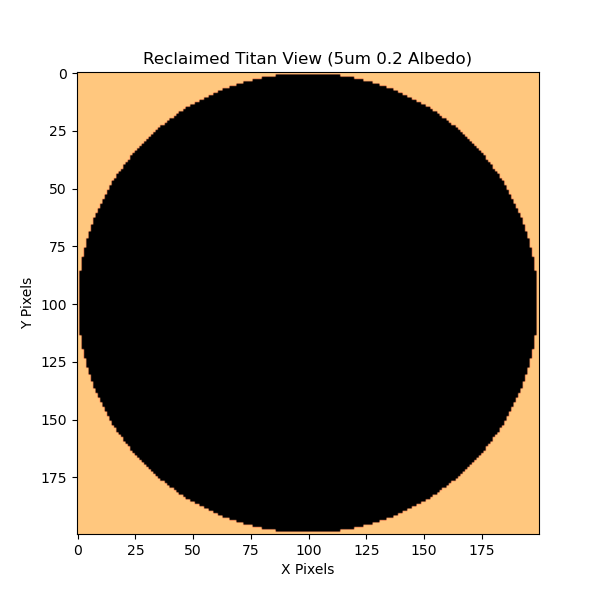

In [45]:
%matplotlib ipympl

mod = 2 #for when the image needs to be scaled. 

#The AI shows up with some fun!
#Gemini provided the base for this code. Let's see how well it works...

def render_object(
    latitude: float,
    longitude: float,
    camera_distance: float,
    object_radius: float,
    resolution: int,
    brightness_matrix: np.ndarray
) -> np.ndarray:
    """
    Generates an image of a spherical object based on viewing geometry.

    Args:
        latitude (float): Latitude of the sub-observer point in degrees (-90 to 90).
        longitude (float): Longitude of the sub-observer point in degrees (-180 to 180).
        camera_distance (float): Distance from the center of the object to the camera.
        object_radius (float): The radius of the spherical object.
        resolution (int): The width and height of the output image in pixels.
        brightness_matrix (np.ndarray): A 3D numpy matrix where brightness is indexed by
                                        (incidence, emission, azimuth) angles in degrees.

    Returns:
        np.ndarray: A 2D numpy array representing the rendered image.
    """
    # -- 1. Setup Coordinate Systems and Vectors --

    # Convert lat/lon from degrees to radians for trigonometric functions
    lat_rad = np.radians(latitude)
    lon_rad = np.radians(longitude)

    # The sun is fixed at 0 lat, 0 lon, which corresponds to the positive x-axis
    # This is a unit vector pointing towards the sun.
    sun_vector = np.array([1.0, 0.0, 0.0])

    # Determine the camera's position in 3D Cartesian coordinates
    # x = r * cos(lat) * cos(lon)
    # y = r * cos(lat) * sin(lon)
    # z = r * sin(lat)
    # NOTE: In physics, spherical coordinates often use polar angle (from Z),
    # so we adjust latitude (angle from XY plane) accordingly.
    cam_x = camera_distance * np.cos(lat_rad) * np.cos(lon_rad)
    cam_y = camera_distance * np.cos(lat_rad) * np.sin(lon_rad)
    cam_z = camera_distance * np.sin(lat_rad)
    camera_position = np.array([cam_x, cam_y, cam_z])

    # -- 2. Create a Rotation Matrix to Align View --
    # We need to rotate the world so the camera is looking along the -Z axis.
    # The new z-axis is the vector from the object center to the camera, normalized.
    z_axis = camera_position / np.linalg.norm(camera_position)
    # The new x-axis is perpendicular to the new z-axis and the world up-vector (0,0,1).
    x_axis = np.cross(np.array([0.0, 0.0, 1.0]), z_axis)
    x_axis /= np.linalg.norm(x_axis)
    # The new y-axis completes the right-handed coordinate system.
    y_axis = np.cross(z_axis, x_axis)

    # The rotation matrix transforms points from the world frame to the camera's frame.
    # We will use its transpose to rotate from the camera frame back to the world.
    rot_matrix = np.array([x_axis, y_axis, z_axis])


    # -- 3. Create a Grid for the Image --

    # Create a grid of (x, y) coordinates corresponding to the pixel locations.
    # The grid spans from -radius to +radius.
    pixel_coords = np.linspace(-object_radius, object_radius, resolution)
    xx, yy = np.meshgrid(pixel_coords, pixel_coords)

    # Calculate the squared distance from the center for each pixel.
    rr_sq = xx**2 + yy**2
    # Create a boolean mask for pixels that fall within the object's disk.
    disk_mask = rr_sq <= object_radius**2
    
    # Initialize the output image as a black square.
    image = np.ones((resolution, resolution), dtype=np.float32)

    # -- 4. Calculate 3D points on the sphere for each pixel --

    # For pixels on the disk, calculate the z-coordinate on the sphere's surface.
    # This is in the CAMERA's coordinate frame.
    zz = np.sqrt(object_radius**2 - rr_sq[disk_mask])

    # Combine x, y, z to get the 3D positions of visible surface points.
    # Shape: (num_pixels_on_disk, 3)
    points_in_camera_frame = np.vstack((
        xx[disk_mask].flatten(),
        yy[disk_mask].flatten(),
        zz.flatten()
    )).T

    # Rotate these points back into the WORLD coordinate frame.
    points_in_world_frame = points_in_camera_frame @ rot_matrix


    # -- 5. Calculate Viewing Angles for Every Point --

    # The surface normal vector (N) for a sphere at the origin is just the
    # point's position vector, normalized.
    normals = points_in_world_frame / object_radius

    # The vector from a surface point to the camera (V).
    view_vectors = camera_position - points_in_world_frame
    view_vectors /= np.linalg.norm(view_vectors, axis=1)[:, np.newaxis]

    # Incidence Angle (i): Angle between the normal and the sun vector.
    # Using einsum for efficient batch dot product.
    cos_i = np.einsum('ij,j->i', normals, sun_vector)
    # Emission Angle (e): Angle between the normal and the view vector.
    cos_e = np.einsum('ij,ij->i', normals, view_vectors)
    
    # Clip values to handle potential floating point inaccuracies near +/-1
    cos_i = np.clip(cos_i, -1.0, 1.0)
    cos_e = np.clip(cos_e, -1.0, 1.0)

    # Azimuth Angle (az): Angle between the plane of incidence and plane of emission.
    # Calculated using the dot product of the two planes' normal vectors.
    plane_normal_incidence = np.cross(sun_vector, normals)
    plane_normal_emission = np.cross(view_vectors, normals)
    
    # Normalize the plane normals
    plane_normal_incidence /= np.linalg.norm(plane_normal_incidence, axis=1)[:, np.newaxis]
    plane_normal_emission /= np.linalg.norm(plane_normal_emission, axis=1)[:, np.newaxis]

    cos_az = np.einsum('ij,ij->i', plane_normal_incidence, plane_normal_emission)
    cos_az = np.clip(cos_az, -1.0, 1.0)

    # Convert all angles from radians to degrees
    incidence_angles = np.rad2deg(np.arccos(cos_i))
    emission_angles = np.rad2deg(np.arccos(cos_e))
    azimuth_angles = 180 - np.rad2deg(np.arccos(cos_az))

    # -- 6. Look Up Brightness and Create Final Image --

    # Get the dimensions of the input brightness matrix.
    inc_dim, emi_dim, azi_dim = brightness_matrix.shape

    # Map the calculated angles to the corresponding indices in the brightness matrix.
    # The matrix covers 0-90 for incidence/emission, and 0-180 for azimuth.
    inc_indices = (incidence_angles / 100.0 * (inc_dim - 1)).astype(int) #GM: manually adjusted since we can go over the limb edge because of the atmosphere.
    emi_indices = (emission_angles / 90.0 * (emi_dim - 1)).astype(int) 
    azi_indices = (azimuth_angles / 180.0 * (azi_dim - 1)).astype(int)

    # Ensure indices are within the bounds of the array.
    inc_indices = np.clip(inc_indices, 0, inc_dim - 1)
    emi_indices = np.clip(emi_indices, 0, emi_dim - 1)
    azi_indices = np.clip(azi_indices, 0, azi_dim - 1)
    
    # Look up the brightness value for each point using the calculated indices.
    brightness_values = brightness_matrix[inc_indices, emi_indices, azi_indices]*mod #GM: this is the step where we adjust for visibility if desired.

    # Any point where the incidence angle > 100 degrees is on the night side. 
    #GM: Used to be 90, but atmospheric effects allow bleedthrough.
    brightness_values[incidence_angles > 100] = 0.0
    brightness_values[emission_angles > 90] = 0.0

    # Place the calculated brightness values onto the image canvas.
    image[disk_mask] = brightness_values

    return image

# -- Example Usage --

# For demonstration, we'll create a sample brightness matrix.
# A real matrix would be loaded from a file (e.g., a NASA PDS data file).
# This simple model makes the object brightest at the sub-solar point.
INC_RES, EMI_RES, AZI_RES = (91, 91, 181) # Corresponds to 0-90, 0-90, 0-180 degrees
inc_angles_rad = np.radians(np.linspace(0, 90, INC_RES))

# Create a simple Lommel-Seeliger scattering model for demonstration
# Brightness ~ cos(i) / (cos(i) + cos(e))
# We will ignore azimuth for this simple model
_i, _e = np.meshgrid(np.linspace(0, 90, INC_RES), np.linspace(0, 90, EMI_RES))
cos_i = np.cos(np.radians(_i))
cos_e = np.cos(np.radians(_e))
with np.errstate(divide='ignore', invalid='ignore'):
    simple_model_2d = cos_i / (cos_i + cos_e)
simple_model_2d = np.nan_to_num(simple_model_2d)

# Expand this 2D model into our 3D brightness matrix (ignoring azimuth)
demo_brightness_matrix = np.zeros((INC_RES, EMI_RES, AZI_RES))
demo_brightness_matrix[:, :, :] = simple_model_2d[:, :, np.newaxis]
demo_brightness_matrix = np.clip(demo_brightness_matrix, 0, 1)


# --- RENDER THE IMAGE ---
print("Rendering object...")
final_image = render_object(
    latitude=45,              # Camera position
    longitude=45,             # Camera position
    camera_distance=1e6+2575e3,      # 1000km from SURFACE
    object_radius=2575e3,      # Titan Radius
    resolution=512,           # 512x512 pixel image
    brightness_matrix=loadedModels[0]
    #brightness_matrix=demo_brightness_matrix 
)
print("Rendering complete.")

# -- Display the Result (requires matplotlib) --
#INCOMPLETE DO LATER

import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt

latSpace = np.linspace(-90, 90, 181)
lonSpace = np.linspace(0, 359, 360)
camSpace = np.linspace(2575e3,0.25e8+2575e3,100)

def interfaceWrapper(
    lat: float,
    lon: float,
    camdist: float,
) -> np.ndarray:

    res=200

    R = render_object(
        latitude=lat,              # Camera position
        longitude=lon,             # Camera position
        camera_distance=camdist,      # from SURFACE
        object_radius=2575e3,      # Titan Radius
        resolution=res,           
        brightness_matrix=loadedModels[0]
        #brightness_matrix=demo_brightness_matrix 
    )
    
    return R

#image = axs[1,1].imshow(ndimage.rotate(colorData,90), origin="lower") 


#plt.imshow(final_image, cmap='viridis', origin='lower')
#plt.show()

fig, ax = plt.subplots(figsize = (6,6)) #matplotlib's axis and figure notation is so annoying and obtuse...

controls = iplt.imshow(interfaceWrapper, lat=latSpace, lon=lonSpace, camdist=camSpace,  ax = ax, cmap="copper")

ax.set(xlabel = "X Pixels", ylabel = "Y Pixels", title="Reclaimed Titan View (5um 0.2 Albedo)")
plt.show()
#plt.savefig("TitanColorSchemes.tif", format="tif", bbox_inches='tight')


#iplt.plot(ControlPlottingManager.modelFunc2, controls=controls, ax = ax, label="Old Lambertian Model")
#iplt.plot(LkD, controls=controls, ax = ax, label="North Pole Lake Data")
#iplt.plot(LnD, controls=controls, ax = ax, label="North Pole Land Data")
#iplt.plot(eDunes, controls=controls, ax = ax, label="Equatorial Dunes Data")
#iplt.plot(ePlains, controls=controls, ax = ax, label="Equatorial Plains Data")
#iplt.plot(eHumm, controls=controls, ax = ax, label="Equatorial Hummocky Data")
#iplt.plot(eXana, controls=controls, ax = ax, label="Equatorial Xanadu Data")
#iplt.plot(SpecialD2, controls=controls, ax = ax, label="New 2um Specular Model (Haze 2)")
#iplt.plot(SpecialD, controls=controls, ax = ax, label="Huygens Landing Site Data")
#iplt.plot(HMR, controls=controls, ax = ax, label="Huygens Landing Site Data (Reduced)")
#iplt.plot(HMR2, controls=controls, ax = ax, label="Huygens Landing Site Data (Reduced2)")
#iplt.plot(L0, controls=controls, ax = ax, label="Lambertian Model 0.0 A")
#iplt.plot(L1, controls=controls, ax = ax, label="Lambertian Model 0.1 A")
#iplt.plot(L2, controls=controls, ax = ax, label="Lambertian Model 0.2 A")




Rendering object...
Rendering complete.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.5454545].


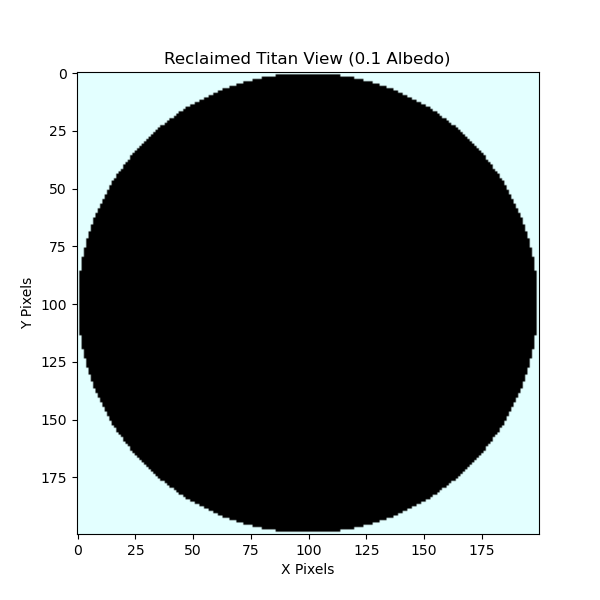

In [44]:
%matplotlib ipympl

#The AI shows up with some fun!
#Gemini provided the base for this code. Let's see how well it works...

def render_object(
    latitude: float,
    longitude: float,
    camera_distance: float,
    object_radius: float,
    resolution: int,
    brightness_matrix: np.ndarray
) -> np.ndarray:
    """
    Generates an image of a spherical object based on viewing geometry.

    Args:
        latitude (float): Latitude of the sub-observer point in degrees (-90 to 90).
        longitude (float): Longitude of the sub-observer point in degrees (-180 to 180).
        camera_distance (float): Distance from the center of the object to the camera.
        object_radius (float): The radius of the spherical object.
        resolution (int): The width and height of the output image in pixels.
        brightness_matrix (np.ndarray): A 3D numpy matrix where brightness is indexed by
                                        (incidence, emission, azimuth) angles in degrees.

    Returns:
        np.ndarray: A 2D numpy array representing the rendered image.
    """
    # -- 1. Setup Coordinate Systems and Vectors --

    # Convert lat/lon from degrees to radians for trigonometric functions
    lat_rad = np.radians(latitude)
    lon_rad = np.radians(longitude)

    # The sun is fixed at 0 lat, 0 lon, which corresponds to the positive x-axis
    # This is a unit vector pointing towards the sun.
    sun_vector = np.array([1.0, 0.0, 0.0])

    # Determine the camera's position in 3D Cartesian coordinates
    # x = r * cos(lat) * cos(lon)
    # y = r * cos(lat) * sin(lon)
    # z = r * sin(lat)
    # NOTE: In physics, spherical coordinates often use polar angle (from Z),
    # so we adjust latitude (angle from XY plane) accordingly.
    cam_x = camera_distance * np.cos(lat_rad) * np.cos(lon_rad)
    cam_y = camera_distance * np.cos(lat_rad) * np.sin(lon_rad)
    cam_z = camera_distance * np.sin(lat_rad)
    camera_position = np.array([cam_x, cam_y, cam_z])

    # -- 2. Create a Rotation Matrix to Align View --
    # We need to rotate the world so the camera is looking along the -Z axis.
    # The new z-axis is the vector from the object center to the camera, normalized.
    z_axis = camera_position / np.linalg.norm(camera_position)
    # The new x-axis is perpendicular to the new z-axis and the world up-vector (0,0,1).
    x_axis = np.cross(np.array([0.0, 0.0, 1.0]), z_axis)
    x_axis /= np.linalg.norm(x_axis)
    # The new y-axis completes the right-handed coordinate system.
    y_axis = np.cross(z_axis, x_axis)

    # The rotation matrix transforms points from the world frame to the camera's frame.
    # We will use its transpose to rotate from the camera frame back to the world.
    rot_matrix = np.array([x_axis, y_axis, z_axis])


    # -- 3. Create a Grid for the Image --

    # Create a grid of (x, y) coordinates corresponding to the pixel locations.
    # The grid spans from -radius to +radius.
    pixel_coords = np.linspace(-object_radius, object_radius, resolution)
    xx, yy = np.meshgrid(pixel_coords, pixel_coords)

    # Calculate the squared distance from the center for each pixel.
    rr_sq = xx**2 + yy**2
    # Create a boolean mask for pixels that fall within the object's disk.
    disk_mask = rr_sq <= object_radius**2
    
    # Initialize the output image as a black square.
    image = np.ones((resolution, resolution), dtype=np.float32)

    # -- 4. Calculate 3D points on the sphere for each pixel --

    # For pixels on the disk, calculate the z-coordinate on the sphere's surface.
    # This is in the CAMERA's coordinate frame.
    zz = np.sqrt(object_radius**2 - rr_sq[disk_mask])

    # Combine x, y, z to get the 3D positions of visible surface points.
    # Shape: (num_pixels_on_disk, 3)
    points_in_camera_frame = np.vstack((
        xx[disk_mask].flatten(),
        yy[disk_mask].flatten(),
        zz.flatten()
    )).T

    # Rotate these points back into the WORLD coordinate frame.
    points_in_world_frame = points_in_camera_frame @ rot_matrix


    # -- 5. Calculate Viewing Angles for Every Point --

    # The surface normal vector (N) for a sphere at the origin is just the
    # point's position vector, normalized.
    normals = points_in_world_frame / object_radius

    # The vector from a surface point to the camera (V).
    view_vectors = camera_position - points_in_world_frame
    view_vectors /= np.linalg.norm(view_vectors, axis=1)[:, np.newaxis]

    # Incidence Angle (i): Angle between the normal and the sun vector.
    # Using einsum for efficient batch dot product.
    cos_i = np.einsum('ij,j->i', normals, sun_vector)
    # Emission Angle (e): Angle between the normal and the view vector.
    cos_e = np.einsum('ij,ij->i', normals, view_vectors)
    
    # Clip values to handle potential floating point inaccuracies near +/-1
    cos_i = np.clip(cos_i, -1.0, 1.0)
    cos_e = np.clip(cos_e, -1.0, 1.0)

    # Azimuth Angle (az): Angle between the plane of incidence and plane of emission.
    # Calculated using the dot product of the two planes' normal vectors.
    plane_normal_incidence = np.cross(sun_vector, normals)
    plane_normal_emission = np.cross(view_vectors, normals)
    
    # Normalize the plane normals
    plane_normal_incidence /= np.linalg.norm(plane_normal_incidence, axis=1)[:, np.newaxis]
    plane_normal_emission /= np.linalg.norm(plane_normal_emission, axis=1)[:, np.newaxis]

    cos_az = np.einsum('ij,ij->i', plane_normal_incidence, plane_normal_emission)
    cos_az = np.clip(cos_az, -1.0, 1.0)

    # Convert all angles from radians to degrees
    incidence_angles = np.rad2deg(np.arccos(cos_i))
    emission_angles = np.rad2deg(np.arccos(cos_e))
    azimuth_angles = 180 - np.rad2deg(np.arccos(cos_az))

    # -- 6. Look Up Brightness and Create Final Image --

    # Get the dimensions of the input brightness matrix.
    inc_dim, emi_dim, azi_dim = brightness_matrix.shape

    # Map the calculated angles to the corresponding indices in the brightness matrix.
    # The matrix covers 0-90 for incidence/emission, and 0-180 for azimuth.
    inc_indices = (incidence_angles / 100.0 * (inc_dim - 1)).astype(int) #GM: manually adjusted since we can go over the limb edge because of the atmosphere.
    emi_indices = (emission_angles / 90.0 * (emi_dim - 1)).astype(int)
    azi_indices = (azimuth_angles / 180.0 * (azi_dim - 1)).astype(int)

    # Ensure indices are within the bounds of the array.
    inc_indices = np.clip(inc_indices, 0, inc_dim - 1)
    emi_indices = np.clip(emi_indices, 0, emi_dim - 1)
    azi_indices = np.clip(azi_indices, 0, azi_dim - 1)
    
    # Look up the brightness value for each point using the calculated indices.
    brightness_values = brightness_matrix[inc_indices, emi_indices, azi_indices]

    # Any point where the incidence angle > 100 degrees is on the night side. 
    #GM: Used to be 90, but atmospheric effects allow bleedthrough.
    brightness_values[incidence_angles > 100] = 0.0
    brightness_values[emission_angles > 90] = 0.0

    # Place the calculated brightness values onto the image canvas.
    image[disk_mask] = brightness_values

    return image

# -- Example Usage --

# For demonstration, we'll create a sample brightness matrix.
# A real matrix would be loaded from a file (e.g., a NASA PDS data file).
# This simple model makes the object brightest at the sub-solar point.
INC_RES, EMI_RES, AZI_RES = (91, 91, 181) # Corresponds to 0-90, 0-90, 0-180 degrees
inc_angles_rad = np.radians(np.linspace(0, 90, INC_RES))

# Create a simple Lommel-Seeliger scattering model for demonstration
# Brightness ~ cos(i) / (cos(i) + cos(e))
# We will ignore azimuth for this simple model
_i, _e = np.meshgrid(np.linspace(0, 90, INC_RES), np.linspace(0, 90, EMI_RES))
cos_i = np.cos(np.radians(_i))
cos_e = np.cos(np.radians(_e))
with np.errstate(divide='ignore', invalid='ignore'):
    simple_model_2d = cos_i / (cos_i + cos_e)
simple_model_2d = np.nan_to_num(simple_model_2d)

# Expand this 2D model into our 3D brightness matrix (ignoring azimuth)
demo_brightness_matrix = np.zeros((INC_RES, EMI_RES, AZI_RES))
demo_brightness_matrix[:, :, :] = simple_model_2d[:, :, np.newaxis]
demo_brightness_matrix = np.clip(demo_brightness_matrix, 0, 1)


# --- RENDER THE IMAGE ---
print("Rendering object...")
final_image = render_object(
    latitude=45,              # Camera position
    longitude=45,             # Camera position
    camera_distance=1e6+2575e3,      # 1000km from SURFACE
    object_radius=2575e3,      # Titan Radius
    resolution=512,           # 512x512 pixel image
    brightness_matrix=loadedModels[0]
    #brightness_matrix=demo_brightness_matrix 
)
print("Rendering complete.")

# -- Display the Result (requires matplotlib) --
#INCOMPLETE DO LATER

import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt

latSpace = np.linspace(-90, 90, 181)
lonSpace = np.linspace(0, 359, 360)
camSpace = np.linspace(2575e3,0.25e8+2575e3,100)

def interfaceWrapper(
    lat: float,
    lon: float,
    camdist: float,
) -> np.ndarray:

    res=200

    R = render_object(
        latitude=lat,              # Camera position
        longitude=lon,             # Camera position
        camera_distance=camdist,      # from SURFACE
        object_radius=2575e3,      # Titan Radius
        resolution=res,           
        brightness_matrix=loadedModels[2]
        #brightness_matrix=demo_brightness_matrix 
    )
    
    G = render_object(
        latitude=lat,              # Camera position
        longitude=lon,             # Camera position
        camera_distance=camdist,      # from SURFACE
        object_radius=2575e3,      # Titan Radius
        resolution=res,          
        brightness_matrix=loadedModels[1]
        #brightness_matrix=demo_brightness_matrix 
    )
    B = render_object(
        latitude=lat,              # Camera position
        longitude=lon,             # Camera position
        camera_distance=camdist,      # from SURFACE
        object_radius=2575e3,      # Titan Radius
        resolution=res,          
        brightness_matrix=loadedModels[0]
        #brightness_matrix=demo_brightness_matrix 
    )

    mod=1
    R = R/(mod*1.12) #I am still very unsure why we don't have the 1/16 here when we have it in both places in the full thing, but whatever.
    G = G/(mod*0.22)
    B = (B-0.03)/(mod*0.37)

    #B's value can introduce negatives, remove them.
    i,j = 0,0
    for x in B:
        j=0
        for y in x:
            if (y < 0):
                B[i][j] = 0
            j = j+1
        i = i+1
    
    return np.transpose([R,G,B])

#image = axs[1,1].imshow(ndimage.rotate(colorData,90), origin="lower") 


#plt.imshow(final_image, cmap='viridis', origin='lower')
#plt.show()

fig, ax = plt.subplots(figsize = (6,6)) #matplotlib's axis and figure notation is so annoying and obtuse...

controls = iplt.imshow(interfaceWrapper, lat=latSpace, lon=lonSpace, camdist=camSpace,  ax = ax)

ax.set(xlabel = "X Pixels", ylabel = "Y Pixels", title="Reclaimed Titan View (0.1 Albedo)")
plt.show()
#plt.savefig("TitanColorSchemes.tif", format="tif", bbox_inches='tight')


#iplt.plot(ControlPlottingManager.modelFunc2, controls=controls, ax = ax, label="Old Lambertian Model")
#iplt.plot(LkD, controls=controls, ax = ax, label="North Pole Lake Data")
#iplt.plot(LnD, controls=controls, ax = ax, label="North Pole Land Data")
#iplt.plot(eDunes, controls=controls, ax = ax, label="Equatorial Dunes Data")
#iplt.plot(ePlains, controls=controls, ax = ax, label="Equatorial Plains Data")
#iplt.plot(eHumm, controls=controls, ax = ax, label="Equatorial Hummocky Data")
#iplt.plot(eXana, controls=controls, ax = ax, label="Equatorial Xanadu Data")
#iplt.plot(SpecialD2, controls=controls, ax = ax, label="New 2um Specular Model (Haze 2)")
#iplt.plot(SpecialD, controls=controls, ax = ax, label="Huygens Landing Site Data")
#iplt.plot(HMR, controls=controls, ax = ax, label="Huygens Landing Site Data (Reduced)")
#iplt.plot(HMR2, controls=controls, ax = ax, label="Huygens Landing Site Data (Reduced2)")
#iplt.plot(L0, controls=controls, ax = ax, label="Lambertian Model 0.0 A")
#iplt.plot(L1, controls=controls, ax = ax, label="Lambertian Model 0.1 A")
#iplt.plot(L2, controls=controls, ax = ax, label="Lambertian Model 0.2 A")


